In [1]:
from __future__ import division
# import cvxpy as cvx
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm 
from functools import reduce
from math import sqrt, exp
from scipy.stats import norm

In [2]:
# monthly data
# returns dataframe

def get_data_for_multiple_stocks_monthly(tickers, start_date, end_date):
    
    stocks = pd.DataFrame()

    for ticker in tickers:
        s = web.get_data_yahoo(ticker, start_date, end_date, interval='m')
        
        stocks[ticker+" adj_close"] = s['Adj Close']
        stocks[ticker + ' prev_close'] = s['Adj Close'].shift(1)
        stocks[ticker+" log_returns"] = np.log(s['Adj Close']/s['Adj Close'].shift(1))
        
    return stocks

In [3]:
# daily data
# returns dataframe

def get_data_for_multiple_stocks_daily(tickers, start_date, end_date):
    
    stocks = pd.DataFrame()

    for ticker in tickers:
        s = web.get_data_yahoo(ticker, start_date, end_date, interval='d')
        
        stocks[ticker+" adj_close"] = s['Adj Close']
        stocks[ticker + ' prev_close'] = s['Adj Close'].shift(1)
        stocks[ticker+" log_returns"] = np.log(s['Adj Close']/s['Adj Close'].shift(1))
        
    return stocks

In [4]:
# # PREVIOUS

# def get_data_for_multiple_stocks(tickers, start_date, end_date):

#     s = web.get_data_yahoo(tickers[0], start_date, end_date, interval='d')[["Adj Close"]]
#     # get log returns
#     s[tickers[0]+" adj_close"] = s['Adj Close']
#     s[tickers[0]+" log_returns"] = np.log(s['Adj Close']/s['Adj Close'].shift(1))
#     s[tickers[0] + ' prev close'] = s['Adj Close'].shift(1)
#     stocks = s[[tickers[0]+" adj_close"]]
#     stocks[tickers[0]+" log_returns"] = s[tickers[0]+" log_returns"]
#     stocks[tickers[0] + ' prev close'] = s[tickers[0] + ' prev close']

#     for ticker in tickers[1:]:
#         s = web.get_data_yahoo(ticker, start_date, end_date, interval='m')
#         s[ticker+" adj_close"] = s['Adj Close'] # adj close price
#         s[ticker+" log_returns"] = np.log(s['Adj Close']/s['Adj Close'].shift(1))
#         s[ticker + ' prev close'] = s['Adj Close'].shift(1)
#         stocks[ticker+" adj_close"] = s[ticker+" adj_close"]
#         stocks[ticker+" log_returns"] = s[ticker+" log_returns"]
#         stocks[ticker + ' prev close'] = s[ticker + ' prev close']
#      #except KeyError:
#        #pass
#     # skip first row that will be na, and fillna by 0 incase there are trading halts on specific days
#     return stocks#stocks.iloc[1:].fillna(0)

In [5]:
# # PREVIOUS

# def get_data_for_multiple_stocks_daily(tickers, start_date, end_date):

#     s = web.get_data_yahoo(tickers[0], start_date, end_date, interval='d')[["Adj Close"]]
#     # get log returns
#     s[tickers[0]+" adj_close"] = s['Adj Close']
#     s[tickers[0]+" log_returns"] = np.log(s['Adj Close']/s['Adj Close'].shift(1))
#     s[tickers[0] + ' prev close'] = s['Adj Close'].shift(1)
#     stocks = s[[tickers[0]+" adj_close"]]
#     stocks[tickers[0]+" log_returns"] = s[tickers[0]+" log_returns"]
#     stocks[tickers[0] + ' prev close'] = s[tickers[0] + ' prev close']

#     for ticker in tickers[1:]:
#         s = web.get_data_yahoo(ticker, start_date, end_date, interval='d')
#         s[ticker+" adj_close"] = s['Adj Close'] # adj close price
#         s[ticker+" log_returns"] = np.log(s['Adj Close']/s['Adj Close'].shift(1))
#         s[ticker + ' prev close'] = s['Adj Close'].shift(1)
#         stocks[ticker+" adj_close"] = s[ticker+" adj_close"]
#         stocks[ticker+" log_returns"] = s[ticker+" log_returns"]
#         stocks[ticker + ' prev close'] = s[ticker + ' prev close']
#      #except KeyError:
#        #pass
#     # skip first row that will be na, and fillna by 0 incase there are trading halts on specific days
#     return stocks#stocks.iloc[1:].fillna(0)

# Question 1 - Returns

## Returns for best portfolio (FSTPX)

In [6]:
tickers_best = ["AAPL", "MSFT", "ADBE", "CRM", "NVDA", "MA", "PYPL", "V", "MU", "FIS",
           "LRCX", "FB", "AMAT", "QCOM", "TWLO", "WDAY", "AMZN", "INTU", "ADSK", "AMD",
           "HUBS", "MELI", "ESTC", "G", "GDDY", "FLEX", "MDB", "NXPI", "FISV", "MRVL"]

returns_df_best = get_data_for_multiple_stocks_monthly(tickers_best,
                                          start_date = "2019-12-01", end_date = "2020-10-31")

In [7]:
returns_df_best.dropna(inplace = True)
returns_df_best.reset_index(inplace=True)
returns_df_best

,Date,AAPL adj_close,AAPL prev_close,AAPL log_returns,MSFT adj_close,MSFT prev_close,MSFT log_returns,ADBE adj_close,ADBE prev_close,ADBE log_returns,...,MDB log_returns,NXPI adj_close,NXPI prev_close,NXPI log_returns,FISV adj_close,FISV prev_close,FISV log_returns,MRVL adj_close,MRVL prev_close,MRVL log_returns
0,2020-01-01,76.091995,72.192863,0.052602,168.886551,156.455429,0.076456,351.140015,329.809998,0.062668,...,0.219475,125.501968,125.516884,-0.000119,118.610001,115.629997,0.025445,23.901917,26.347651,-0.097420
1,2020-02-01,67.204628,76.091995,-0.124201,160.731430,168.886551,-0.049492,345.119995,351.140015,-0.017293,...,-0.072153,112.472961,125.501968,-0.109609,109.360001,118.610001,-0.081196,21.177654,23.901917,-0.121012
2,2020-03-01,62.664707,67.204628,-0.069944,156.892731,160.731430,-0.024173,318.239990,345.119995,-0.081086,...,-0.110547,82.042236,112.472961,-0.315479,94.989998,109.360001,-0.140874,22.500013,21.177654,0.060569
3,2020-04-01,72.401154,62.664707,0.144424,178.281311,156.892731,0.127800,353.640015,318.239990,0.105474,...,0.171781,98.907402,82.042236,0.186950,103.059998,94.989998,0.081540,26.586407,22.500013,0.166884
4,2020-05-01,78.349983,72.401154,0.078964,182.300385,178.281311,0.022293,386.600006,353.640015,0.089111,...,0.358813,95.460487,98.907402,-0.035472,106.769997,103.059998,0.035366,32.522808,26.586407,0.201542
5,2020-06-01,90.879066,78.349983,0.148344,203.019226,182.300385,0.107645,435.309998,386.600006,0.118668,...,-0.025173,113.281105,95.460487,0.171160,97.620003,106.769997,-0.089595,34.955540,32.522808,0.072135
6,2020-07-01,105.886086,90.879066,0.152834,204.515610,203.019226,0.007344,444.320007,435.309998,0.020487,...,0.012033,117.176697,113.281105,0.033811,99.790001,97.620003,0.021986,36.361336,34.955540,0.039429
7,2020-08-01,128.585907,105.886086,0.194233,224.986130,204.515610,0.095394,513.390015,444.320007,0.144491,...,0.020395,125.381966,117.176697,0.067682,99.580002,99.790001,-0.002107,38.725403,36.361336,0.062990
8,2020-09-01,115.610542,128.585907,-0.106370,210.330002,224.986130,-0.067361,490.429993,513.390015,-0.045753,...,-0.009843,124.434814,125.381966,-0.007583,103.050003,99.580002,0.034253,39.644112,38.725403,0.023447
9,2020-10-01,108.672516,115.610542,-0.061888,202.470001,210.330002,-0.038086,447.100006,490.429993,-0.092500,...,-0.013218,135.119995,124.434814,0.082381,95.470001,103.050003,-0.076402,37.457191,39.644112,-0.056744


In [8]:
array_values_best = [2051836821, 1624363933, 329525040, 291785537, 238343597, 219364830, 212343810, 186230240, 185088374, 179336117, 165346944, 162171231, 161982940, 145298238, 121981574, 119200951,116143756, 112774797, 108946944,108161967, 105879493, 99706579, 98161895, 88818510, 83373164, 76143081, 74428092, 69989115, 66668202, 61789443]

array_price = []
for i in range(len(tickers_best)):
    x = returns_df_best.loc[returns_df_best['Date']=='2020-08-01'][tickers_best[i]+' adj_close'].values
    array_price.append(x)
    
shares = []
for i in range(len(array_price)):
    shares.append(np.round(array_values_best[i]/array_price[i],0)[0])

print(shares)
# values = sum of adj close price * num of shares of all stocks

total = 0
for y in range(len(shares)):
    total += (returns_df_best[tickers_best[y]+" prev_close"]*shares[y])
    
for y in range(len(shares)):
    returns_df_best["value"] = total

for x in range(len(shares)):
    returns_df_best[tickers_best[x]+"_weight"] = (returns_df_best[tickers_best[x]+" prev_close"]*shares[x])/total

[15956934.0, 7219840.0, 641861.0, 1070184.0, 445652.0, 613139.0, 1040187.0, 879814.0, 4066983.0, 1191646.0, 493512.0, 553108.0, 2638331.0, 1226502.0, 452186.0, 497271.0, 33655.0, 327091.0, 443415.0, 1190949.0, 353309.0, 85322.0, 904051.0, 2111030.0, 996333.0, 7011334.0, 318341.0, 558207.0, 669494.0, 1595579.0]


In [9]:
returns_df_best["portfolio return"] = 0

for i in range(len(tickers_best)):
    returns_df_best["portfolio return"] += returns_df_best[tickers_best[i]+"_weight"]*(np.exp(returns_df_best[tickers_best[i]+" log_returns"]) - 1)

returns_df_best["portfolio return"] = np.log(1+returns_df_best["portfolio return"])
returns_df_best

,Date,AAPL adj_close,AAPL prev_close,AAPL log_returns,MSFT adj_close,MSFT prev_close,MSFT log_returns,ADBE adj_close,ADBE prev_close,ADBE log_returns,...,MELI_weight,ESTC_weight,G_weight,GDDY_weight,FLEX_weight,MDB_weight,NXPI_weight,FISV_weight,MRVL_weight,portfolio return
0,2020-01-01,76.091995,72.192863,0.052602,168.886551,156.455429,0.076456,351.140015,329.809998,0.062668,...,0.009417,0.011218,0.017012,0.013059,0.017076,0.008085,0.013521,0.014939,0.008113,0.052644
1,2020-02-01,67.204628,76.091995,-0.124201,160.731430,168.886551,-0.049492,345.119995,351.140015,-0.017293,...,0.010357,0.010739,0.016979,0.012260,0.016880,0.009553,0.012826,0.014539,0.006982,-0.061766
2,2020-03-01,62.664707,67.204628,-0.069944,156.892731,160.731430,-0.024173,318.239990,345.119995,-0.081086,...,0.010236,0.013004,0.015691,0.013579,0.015170,0.009455,0.012227,0.014259,0.006581,-0.110870
3,2020-04-01,72.401154,62.664707,0.144424,178.281311,156.892731,0.127800,353.640015,318.239990,0.105474,...,0.009070,0.010978,0.013310,0.012381,0.012784,0.009458,0.009965,0.013837,0.007811,0.138666
4,2020-05-01,78.349983,72.401154,0.078964,182.300385,178.281311,0.022293,386.600006,353.640015,0.089111,...,0.009430,0.010983,0.013696,0.013103,0.012962,0.009776,0.010458,0.013069,0.008035,0.084689
5,2020-06-01,90.879066,78.349983,0.148344,203.019226,182.300385,0.107645,435.309998,386.600006,0.118668,...,0.012646,0.013518,0.013139,0.013395,0.011848,0.012859,0.009274,0.012440,0.009031,0.091070
6,2020-07-01,105.886086,90.879066,0.152834,204.515610,203.019226,0.007344,444.320007,435.309998,0.020487,...,0.013363,0.013245,0.012186,0.011608,0.011418,0.011448,0.010047,0.010384,0.008862,0.076226
7,2020-08-01,128.585907,105.886086,0.194233,224.986130,204.515610,0.095394,513.390015,444.320007,0.144491,...,0.014127,0.012803,0.012344,0.010309,0.011860,0.010736,0.009630,0.009836,0.008541,0.120874
8,2020-09-01,115.610542,128.585907,-0.106370,210.330002,224.986130,-0.067361,490.429993,513.390015,-0.045753,...,0.013008,0.012806,0.011587,0.010877,0.009934,0.009710,0.009131,0.008698,0.008061,-0.064527
9,2020-10-01,108.672516,115.610542,-0.061888,202.470001,210.330002,-0.038086,447.100006,490.429993,-0.092500,...,0.012852,0.013573,0.011413,0.010533,0.010869,0.010256,0.009666,0.009601,0.008802,-0.040388


## Returns for worst portfolio (FDMAX)

In [10]:
tickers_worst = ["ERIC", "NOK", "CSCO", "FFIV", "CIEN", "JNPR", "MSI", "LITE", "SATS", "VIAV", "ACIA", "ANET", "CALX", "IDCC", 
           "VSAT", "NTCT", "COMM", "ET.TO", "FTNT", "PANW", "TENB", "HLIT", "ADTN", "EXTR",
           "INSG", "RPD", "SW.TO", "CVLT", "GLW", "RBBN"]

returns_df_worst = get_data_for_multiple_stocks_monthly(tickers_worst,
                                          start_date = "2019-12-01", end_date = "2020-10-31")

In [11]:
returns_df_worst.dropna(inplace = True)
returns_df_worst.reset_index(inplace=True)
returns_df_worst

,Date,ERIC adj_close,ERIC prev_close,ERIC log_returns,NOK adj_close,NOK prev_close,NOK log_returns,CSCO adj_close,CSCO prev_close,CSCO log_returns,...,SW.TO log_returns,CVLT adj_close,CVLT prev_close,CVLT log_returns,GLW adj_close,GLW prev_close,GLW log_returns,RBBN adj_close,RBBN prev_close,RBBN log_returns
0,2020-01-01,7.723459,8.627477,-0.110690,3.88,3.71,0.044803,44.442673,46.366550,-0.042378,...,0.030209,45.020000,44.639999,0.008477,26.032068,28.392416,-0.086793,2.82,3.10,-0.094665
1,2020-02-01,7.900332,7.723459,0.022642,3.87,3.88,-0.002581,38.887131,44.442673,-0.133537,...,-0.201454,41.700001,45.020000,-0.076606,23.271832,26.032068,-0.112085,3.23,2.82,0.135745
2,2020-03-01,7.949464,7.900332,0.006200,3.10,3.87,-0.221852,38.283325,38.887131,-0.015649,...,-0.272473,40.480000,41.700001,-0.029693,20.209759,23.271832,-0.141078,3.03,3.23,-0.063920
3,2020-04-01,8.313036,7.949464,0.044720,3.58,3.10,0.143961,41.273144,38.283325,0.075198,...,0.496382,42.689999,40.480000,0.053157,21.656122,20.209759,0.069123,3.65,3.03,0.186165
4,2020-05-01,9.068660,8.313036,0.087000,3.95,3.58,0.098353,47.012615,41.273144,0.130204,...,-0.084648,40.459999,42.689999,-0.053651,22.423580,21.656122,0.034825,4.40,3.65,0.186877
5,2020-06-01,9.227410,9.068660,0.017354,4.40,3.95,0.107889,45.852539,47.012615,-0.024985,...,0.015709,38.700001,40.459999,-0.044474,25.726173,22.423580,0.137396,3.93,4.40,-0.112965
6,2020-07-01,11.459848,9.227410,0.216671,4.78,4.40,0.082836,46.304768,45.852539,0.009814,...,0.379705,44.080002,38.700001,0.130167,30.791946,25.726173,0.179744,4.40,3.93,0.112965
7,2020-08-01,11.559068,11.459848,0.008621,4.90,4.78,0.024795,41.834137,46.304768,-0.101532,...,-0.095928,43.230000,44.080002,-0.019472,32.242146,30.791946,0.046021,4.28,4.40,-0.027652
8,2020-09-01,10.805000,11.559068,-0.067461,3.91,4.90,-0.225698,39.029999,41.834137,-0.069382,...,-0.085721,40.799999,43.230000,-0.057853,32.410000,32.242146,0.005193,3.87,4.28,-0.100699
9,2020-10-01,11.122502,10.805000,0.028961,3.37,3.91,-0.148625,35.571899,39.029999,-0.092775,...,-0.005398,39.590000,40.799999,-0.030105,31.969999,32.410000,-0.013669,4.31,3.87,0.107683


In [12]:
array_values_worst = [4077954, 1123183, 3142012, 903417, 870909, 866150, 810271, 631412, 554312, 536947, 523982, 413829, 402207, 400227, 
               369211, 348419, 240423, 49133, 50162, 180187, 154173, 116425, 109336, 106724,
               104755, 102925, 96791, 93550, 56253, 52006]

array_price = []
for i in range(len(tickers_worst)):
    x = returns_df_worst.loc[returns_df_worst['Date']=='2020-08-01'][tickers_worst[i]+' adj_close'].values
    array_price.append(x)
    
shares = []
for i in range(len(array_price)):
    shares.append(np.round(array_values_worst[i]/array_price[i],0))

# values = sum of adj close price * num of shares of all stocks

total = 0
for y in range(len(shares)):
    total += (returns_df_worst[tickers_worst[y]+" prev_close"]*shares[y])
    
for y in range(len(shares)):
    returns_df_worst["value"] = total

for x in range(len(shares)):
    returns_df_worst[tickers_worst[x]+"_weight"] = (returns_df_worst[tickers_worst[x]+" prev_close"]*shares[x])/total

In [13]:
returns_df_worst["portfolio return"] = 0

for i in range(len(tickers_worst)):
    returns_df_worst["portfolio return"] += returns_df_worst[tickers_worst[i]+"_weight"]*(np.exp(returns_df_worst[tickers_worst[i]+" log_returns"]) - 1)

returns_df_worst["portfolio return"] = np.log(1+returns_df_worst["portfolio return"])
returns_df_worst

,Date,ERIC adj_close,ERIC prev_close,ERIC log_returns,NOK adj_close,NOK prev_close,NOK log_returns,CSCO adj_close,CSCO prev_close,CSCO log_returns,...,HLIT_weight,ADTN_weight,EXTR_weight,INSG_weight,RPD_weight,SW.TO_weight,CVLT_weight,GLW_weight,RBBN_weight,portfolio return
0,2020-01-01,7.723459,8.627477,-0.110690,3.88,3.71,0.044803,44.442673,46.366550,-0.042378,...,0.009235,0.005742,0.010800,0.004013,0.005358,0.004444,0.005796,0.002973,0.002260,-0.046572
1,2020-02-01,7.900332,7.723459,0.022642,3.87,3.88,-0.002581,38.887131,44.442673,-0.133537,...,0.008733,0.005505,0.009058,0.003849,0.005950,0.004799,0.006124,0.002856,0.002154,-0.060855
2,2020-03-01,7.949464,7.900332,0.006200,3.10,3.87,-0.221852,38.283325,38.887131,-0.015649,...,0.008094,0.005204,0.008207,0.004231,0.004930,0.004169,0.006028,0.002713,0.002622,-0.081382
3,2020-04-01,8.313036,7.949464,0.044720,3.58,3.10,0.143961,41.273144,38.283325,0.075198,...,0.008237,0.005442,0.005469,0.004120,0.005005,0.003444,0.006348,0.002556,0.002668,0.106648
4,2020-05-01,9.068660,8.313036,0.087000,3.95,3.58,0.098353,47.012615,41.273144,0.130204,...,0.007455,0.006548,0.005409,0.007103,0.004730,0.005086,0.006018,0.002462,0.002889,0.065252
5,2020-06-01,9.227410,9.068660,0.017354,4.40,3.95,0.107889,45.852539,47.012615,-0.024985,...,0.006491,0.006803,0.004918,0.005914,0.004756,0.004378,0.005343,0.002388,0.003263,-0.005376
6,2020-07-01,11.459848,9.227410,0.216671,4.78,4.40,0.082836,46.304768,45.852539,0.009814,...,0.005751,0.006611,0.006503,0.006494,0.004990,0.004471,0.005138,0.002754,0.002930,0.093150
7,2020-08-01,11.559068,11.459848,0.008621,4.90,4.78,0.024795,41.834137,46.304768,-0.101532,...,0.006155,0.006845,0.006211,0.006875,0.005308,0.005954,0.005332,0.003003,0.002988,-0.022788
8,2020-09-01,10.805000,11.559068,-0.067461,3.91,4.90,-0.225698,39.029999,41.834137,-0.069382,...,0.006658,0.006252,0.006103,0.005990,0.005886,0.005535,0.005350,0.003217,0.002974,-0.097768
9,2020-10-01,11.122502,10.805000,0.028961,3.37,3.91,-0.148625,35.571899,39.029999,-0.092775,...,0.006943,0.006426,0.006191,0.005938,0.006155,0.005602,0.005567,0.003566,0.002965,-0.009769


## Returns for optimal portfolio (before adjustment)

In [14]:
tickers_optimal = ["AAPL", "MSFT", "MA", "V", "FIS", "LRCX", "FB", "QCOM", "INTU", "AMD", "MELI", "G", "MDB", "NXPI"]

returns_df_optimal = get_data_for_multiple_stocks_monthly(tickers_optimal,
                                          start_date = "2019-12-01", end_date = "2020-10-31")

In [15]:
returns_df_optimal.dropna(inplace = True)
returns_df_optimal.reset_index(inplace=True)
returns_df_optimal

,Date,AAPL adj_close,AAPL prev_close,AAPL log_returns,MSFT adj_close,MSFT prev_close,MSFT log_returns,MA adj_close,MA prev_close,MA log_returns,...,MELI log_returns,G adj_close,G prev_close,G log_returns,MDB adj_close,MDB prev_close,MDB log_returns,NXPI adj_close,NXPI prev_close,NXPI log_returns
0,2020-01-01,76.091995,72.192863,0.052602,168.886551,156.455429,0.076456,314.245819,296.988831,0.056481,...,0.147741,43.930374,41.758850,0.050695,163.910004,131.610001,0.219475,125.501968,125.516884,-0.000119
1,2020-02-01,67.204628,76.091995,-0.124201,160.731430,168.886551,-0.049492,289.078735,314.245819,-0.083476,...,-0.073479,38.164944,43.930374,-0.140689,152.500000,163.910004,-0.072153,112.472961,125.501968,-0.109609
2,2020-03-01,62.664707,67.204628,-0.069944,156.892731,160.731430,-0.024173,240.585220,289.078735,-0.183625,...,-0.231793,28.975985,38.164944,-0.275450,136.539993,152.500000,-0.110547,82.042236,112.472961,-0.315479
3,2020-04-01,72.401154,62.664707,0.144424,178.281311,156.892731,0.127800,273.860382,240.585220,0.129544,...,0.177558,34.252018,28.975985,0.167278,162.130005,136.539993,0.171781,98.907402,82.042236,0.186950
4,2020-05-01,78.349983,72.401154,0.078964,182.300385,178.281311,0.022293,300.139191,273.860382,0.091628,...,0.378138,35.764160,34.252018,0.043201,232.110001,162.130005,0.358813,95.460487,98.907402,-0.035472
5,2020-06-01,90.879066,78.349983,0.148344,203.019226,182.300385,0.107645,294.962158,300.139191,-0.017399,...,0.146224,36.331215,35.764160,0.015731,226.339996,232.110001,-0.025173,113.281105,95.460487,0.171160
6,2020-07-01,105.886086,90.879066,0.152834,204.515610,203.019226,0.007344,307.760132,294.962158,0.042474,...,0.131777,39.719501,36.331215,0.089165,229.080002,226.339996,0.012033,117.176697,113.281105,0.033811
7,2020-08-01,128.585907,105.886086,0.194233,224.986130,204.515610,0.095394,357.773376,307.760132,0.150579,...,0.038353,42.073544,39.719501,0.057577,233.800003,229.080002,0.020395,125.381966,117.176697,0.067682
8,2020-09-01,115.610542,128.585907,-0.106370,210.330002,224.986130,-0.067361,337.776672,357.773376,-0.057515,...,-0.076543,38.851696,42.073544,-0.079667,231.509995,233.800003,-0.009843,124.434814,125.381966,-0.007583
9,2020-10-01,108.672516,115.610542,-0.061888,202.470001,210.330002,-0.038086,288.304291,337.776672,-0.158368,...,0.114707,34.369999,38.851696,-0.122568,228.470001,231.509995,-0.013218,135.119995,124.434814,0.082381


In [16]:
returns_df_optimal["portfolio return"] = 0

optimal_weights = [0.052990, 0.092569, 0.156987,  0.137560, 0.074765,
                   0.050595, 0.000872,  0.040578,  0.199530, 0.045174,
                    0.016148,0.044405, 0.015470, 0.072358]

for i in range(len(tickers_optimal)):
    returns_df_optimal["portfolio return"] += optimal_weights[i]*(np.exp(returns_df_optimal[tickers_optimal[i]+" log_returns"]) - 1)

returns_df_optimal["portfolio return"] = np.log(1+returns_df_optimal["portfolio return"])
returns_df_optimal

,Date,AAPL adj_close,AAPL prev_close,AAPL log_returns,MSFT adj_close,MSFT prev_close,MSFT log_returns,MA adj_close,MA prev_close,MA log_returns,...,G adj_close,G prev_close,G log_returns,MDB adj_close,MDB prev_close,MDB log_returns,NXPI adj_close,NXPI prev_close,NXPI log_returns,portfolio return
0,2020-01-01,76.091995,72.192863,0.052602,168.886551,156.455429,0.076456,314.245819,296.988831,0.056481,...,43.930374,41.758850,0.050695,163.910004,131.610001,0.219475,125.501968,125.516884,-0.000119,0.052707
1,2020-02-01,67.204628,76.091995,-0.124201,160.731430,168.886551,-0.049492,289.078735,314.245819,-0.083476,...,38.164944,43.930374,-0.140689,152.500000,163.910004,-0.072153,112.472961,125.501968,-0.109609,-0.070809
2,2020-03-01,62.664707,67.204628,-0.069944,156.892731,160.731430,-0.024173,240.585220,289.078735,-0.183625,...,28.975985,38.164944,-0.275450,136.539993,152.500000,-0.110547,82.042236,112.472961,-0.315479,-0.144133
3,2020-04-01,72.401154,62.664707,0.144424,178.281311,156.892731,0.127800,273.860382,240.585220,0.129544,...,34.252018,28.975985,0.167278,162.130005,136.539993,0.171781,98.907402,82.042236,0.186950,0.135605
4,2020-05-01,78.349983,72.401154,0.078964,182.300385,178.281311,0.022293,300.139191,273.860382,0.091628,...,35.764160,34.252018,0.043201,232.110001,162.130005,0.358813,95.460487,98.907402,-0.035472,0.070840
5,2020-06-01,90.879066,78.349983,0.148344,203.019226,182.300385,0.107645,294.962158,300.139191,-0.017399,...,36.331215,35.764160,0.015731,226.339996,232.110001,-0.025173,113.281105,95.460487,0.171160,0.045264
6,2020-07-01,105.886086,90.879066,0.152834,204.515610,203.019226,0.007344,307.760132,294.962158,0.042474,...,39.719501,36.331215,0.089165,229.080002,226.339996,0.012033,117.176697,113.281105,0.033811,0.071441
7,2020-08-01,128.585907,105.886086,0.194233,224.986130,204.515610,0.095394,357.773376,307.760132,0.150579,...,42.073544,39.719501,0.057577,233.800003,229.080002,0.020395,125.381966,117.176697,0.067682,0.100891
8,2020-09-01,115.610542,128.585907,-0.106370,210.330002,224.986130,-0.067361,337.776672,357.773376,-0.057515,...,38.851696,42.073544,-0.079667,231.509995,233.800003,-0.009843,124.434814,125.381966,-0.007583,-0.052966
9,2020-10-01,108.672516,115.610542,-0.061888,202.470001,210.330002,-0.038086,288.304291,337.776672,-0.158368,...,34.369999,38.851696,-0.122568,228.470001,231.509995,-0.013218,135.119995,124.434814,0.082381,-0.059174


## Monthly returns graph

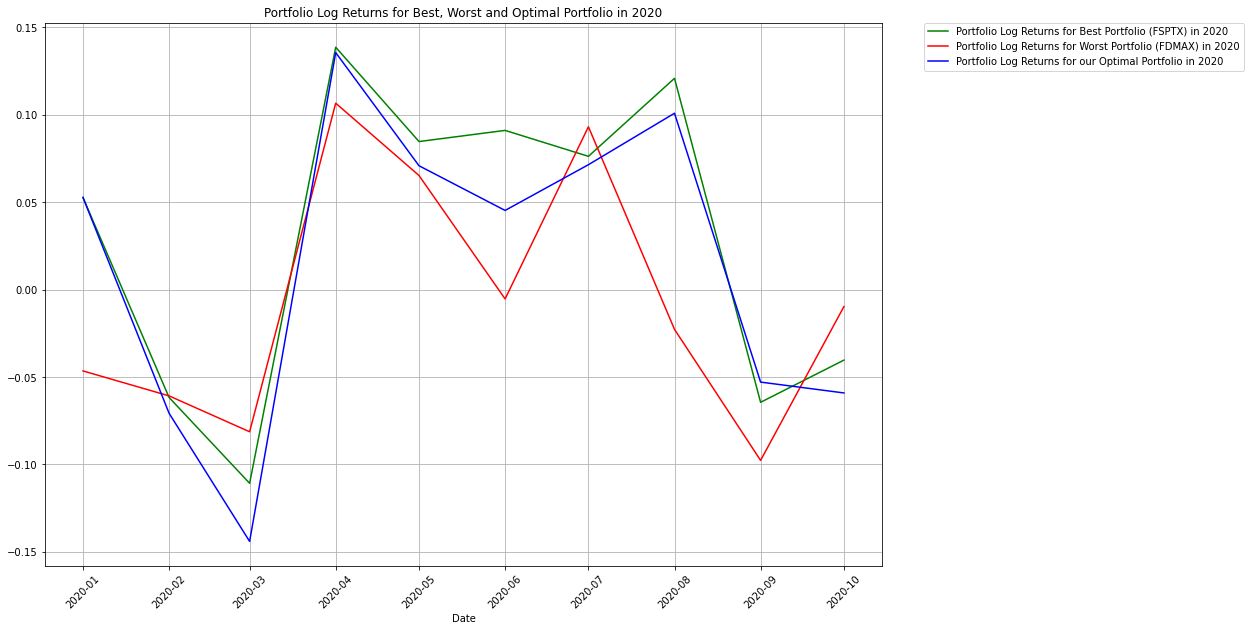

In [17]:
plt.figure(figsize=(15,10))
plt.plot(returns_df_best['Date'], returns_df_best['portfolio return'], 'g', label='Portfolio Log Returns for Best Portfolio (FSPTX) in 2020')
plt.plot(returns_df_worst['Date'], returns_df_worst['portfolio return'], 'r', label='Portfolio Log Returns for Worst Portfolio (FDMAX) in 2020')
plt.plot(returns_df_optimal['Date'], returns_df_optimal['portfolio return'], 'b', label='Portfolio Log Returns for our Optimal Portfolio in 2020')
plt.grid(True)
plt.xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Portfolio Log Returns for Best, Worst and Optimal Portfolio in 2020')
plt.show()

## Monthly returns table

In [18]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct']
table_monthly_returns=pd.DataFrame({'Month':months,'Best':returns_df_best['portfolio return'],'Worst':returns_df_worst['portfolio return'],'Optimal':returns_df_optimal['portfolio return']})
table_monthly_returns

,Month,Best,Worst,Optimal
0,Jan,0.052644,-0.046572,0.052707
1,Feb,-0.061766,-0.060855,-0.070809
2,Mar,-0.110870,-0.081382,-0.144133
3,Apr,0.138666,0.106648,0.135605
4,May,0.084689,0.065252,0.070840
5,Jun,0.091070,-0.005376,0.045264
6,Jul,0.076226,0.093150,0.071441
7,Aug,0.120874,-0.022788,0.100891
8,Sept,-0.064527,-0.097768,-0.052966
9,Oct,-0.040388,-0.009769,-0.059174


## Returns of optimal portfolio (after  adjustment) for Oct 2020

In [19]:
tickers_optimal = ["AAPL", "MSFT", "MA", "V", "FIS", "LRCX", "FB", "QCOM", "INTU", "AMD", "MELI", "G", "MDB", "NXPI"]

returns_df_optimal_after = get_data_for_multiple_stocks_monthly(tickers_optimal,
                                          start_date = "2020-09-01", end_date = "2020-10-31")

In [20]:
returns_df_optimal_after.dropna(inplace = True)
returns_df_optimal_after.reset_index(inplace=True)
returns_df_optimal_after

,Date,AAPL adj_close,AAPL prev_close,AAPL log_returns,MSFT adj_close,MSFT prev_close,MSFT log_returns,MA adj_close,MA prev_close,MA log_returns,...,MELI log_returns,G adj_close,G prev_close,G log_returns,MDB adj_close,MDB prev_close,MDB log_returns,NXPI adj_close,NXPI prev_close,NXPI log_returns
0,2020-10-01,108.672516,115.610542,-0.061888,202.470001,210.330002,-0.038086,288.304291,337.776672,-0.158368,...,0.114707,34.369999,38.851696,-0.122568,228.470001,231.509995,-0.013218,135.119995,124.434814,0.082381


In [21]:
returns_df_optimal_after["portfolio return"] = 0

optimal_weights_after = [0.0609385, 0.1295965999999999998, 0.1334389499999999997, 0.137560,0.074765,
                   0.070833, 0.0556545, 0.040578, 0.119718, 0.0383979,
                   0.016148, 0.044405,0.015470, 0.072358]

for i in range(len(tickers_optimal)):
    returns_df_optimal_after["portfolio return"] += optimal_weights_after[i]*(np.exp(returns_df_optimal_after[tickers_optimal[i]+" log_returns"]) - 1)

returns_df_optimal_after["portfolio return"] = np.log(1+returns_df_optimal_after["portfolio return"])
returns_df_optimal_after

,Date,AAPL adj_close,AAPL prev_close,AAPL log_returns,MSFT adj_close,MSFT prev_close,MSFT log_returns,MA adj_close,MA prev_close,MA log_returns,...,G adj_close,G prev_close,G log_returns,MDB adj_close,MDB prev_close,MDB log_returns,NXPI adj_close,NXPI prev_close,NXPI log_returns,portfolio return
0,2020-10-01,108.672516,115.610542,-0.061888,202.470001,210.330002,-0.038086,288.304291,337.776672,-0.158368,...,34.369999,38.851696,-0.122568,228.470001,231.509995,-0.013218,135.119995,124.434814,0.082381,-0.052905


# Q1 - Annualised Standard Deviation

## Annualised SD for Best Portfolio

In [22]:
tickers_best = ["AAPL", "MSFT", "ADBE", "CRM", "NVDA", "MA", "PYPL", "V", "MU", "FIS",
           "LRCX", "FB", "AMAT", "QCOM", "TWLO", "WDAY", "AMZN", "INTU", "ADSK", "AMD",
           "HUBS", "MELI", "ESTC", "G", "GDDY", "FLEX", "MDB", "NXPI", "FISV", "MRVL"]
returns_df_best_daily = get_data_for_multiple_stocks_daily(tickers_best,
                                          start_date = "2020-01-01", end_date = "2020-10-31")

In [23]:
returns_df_best_daily

,AAPL adj_close,AAPL prev_close,AAPL log_returns,MSFT adj_close,MSFT prev_close,MSFT log_returns,ADBE adj_close,ADBE prev_close,ADBE log_returns,CRM adj_close,...,MDB log_returns,NXPI adj_close,NXPI prev_close,NXPI log_returns,FISV adj_close,FISV prev_close,FISV log_returns,MRVL adj_close,MRVL prev_close,MRVL log_returns
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,72.192863,NaN,NaN,156.455429,NaN,NaN,329.809998,NaN,NaN,162.639999,...,NaN,125.897690,NaN,NaN,115.629997,NaN,NaN,26.407440,NaN,NaN
2020-01-02,73.840042,72.192863,0.022560,159.352386,156.455429,0.018347,334.429993,329.809998,0.013911,166.990005,...,0.020456,127.163986,125.897690,0.010008,115.519997,115.629997,-0.000952,27.222731,26.407440,0.030407
2020-01-03,73.122154,73.840042,-0.009770,157.368179,159.352386,-0.012530,331.809998,334.429993,-0.007865,166.169998,...,0.007121,125.937263,127.163986,-0.009694,116.370003,115.519997,0.007331,26.516809,27.222731,-0.026273
2020-01-06,73.704819,73.122154,0.007937,157.774948,157.368179,0.002581,333.709991,331.809998,0.005710,173.449997,...,0.037787,125.046890,125.937263,-0.007095,116.930000,116.370003,0.004801,25.532495,26.516809,-0.037827
2020-01-07,73.358185,73.704819,-0.004714,156.336395,157.774948,-0.009160,333.390015,333.709991,-0.000959,176.000000,...,-0.011741,126.669334,125.046890,0.012891,116.480003,116.930000,-0.003856,26.099222,25.532495,0.021954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,114.851852,114.841873,0.000087,210.080002,216.229996,-0.028854,475.200012,488.500000,-0.027604,241.979996,...,-0.032373,134.889999,137.179993,-0.016834,98.379997,101.180000,-0.028064,40.889999,41.430000,-0.013120
2020-10-27,116.399178,114.851852,0.013382,213.250000,210.080002,0.014977,478.559998,475.200012,0.007046,250.300003,...,0.016154,133.229996,134.889999,-0.012383,96.610001,98.379997,-0.018155,41.470001,40.889999,0.014085
2020-10-28,111.008476,116.399178,-0.047419,202.679993,213.250000,-0.050837,456.970001,478.559998,-0.046164,238.429993,...,-0.016404,129.770004,133.229996,-0.026313,93.519997,96.610001,-0.032507,39.529999,41.470001,-0.047910


In [24]:
returns_df_best_daily.reset_index(inplace=True)

In [25]:
array_of_values_best = [2051836821, 1624363933, 329525040, 291785537, 238343597, 219364830, 212343810, 186230240, 185088374, 179336117, 165346944, 162171231, 161982940, 145298238, 121981574, 119200951,116143756, 112774797, 108946944,108161967, 105879493, 99706579, 98161895, 88818510, 83373164, 76143081, 74428092, 69989115, 66668202, 61789443]

array_price=[]
for i in range(len(tickers_best)):
    x=returns_df_best_daily.loc[returns_df_best_daily['Date']=='2020-07-31'][tickers_best[i]+' adj_close'].values
    array_price.append(x)

shares=[]
for i in range(len(array_price)):
    shares.append(np.round(array_of_values_best[i]/array_price[i],0))

# values = sum of adj close price*num of shares  for all stocks

total=0
for y in range(len(shares)):
    total+=(returns_df_best_daily[tickers_best[y]+" prev_close"]*shares[y])
    
for y in range(len(shares)):
    returns_df_best_daily["value"]=total

for x in range(len(shares)):
    returns_df_best_daily[tickers_best[x]+"_weight"]=(returns_df_best_daily[tickers_best[x]+" prev_close"]*shares[x])/total

In [26]:
returns_df_best_daily["portfolio return"]=0
for i in range(len(tickers_best)):
    returns_df_best_daily["portfolio return"]+=returns_df_best_daily[tickers_best[i]+"_weight"]*(np.exp(returns_df_best_daily[tickers_best[i]+" log_returns"]) - 1)

returns_df_best_daily["portfolio return"]=np.log(1+returns_df_best_daily["portfolio return"])
returns_df_best_daily.dropna(inplace = True)
returns_df_best_daily

,Date,AAPL adj_close,AAPL prev_close,AAPL log_returns,MSFT adj_close,MSFT prev_close,MSFT log_returns,ADBE adj_close,ADBE prev_close,ADBE log_returns,...,MELI_weight,ESTC_weight,G_weight,GDDY_weight,FLEX_weight,MDB_weight,NXPI_weight,FISV_weight,MRVL_weight,portfolio return
1,2020-01-02,73.840042,72.192863,0.022560,159.352386,156.455429,0.018347,334.429993,329.809998,0.013911,...,0.008710,0.011271,0.016074,0.013840,0.014366,0.007345,0.012917,0.013270,0.007696,0.020266
2,2020-01-03,73.122154,73.840042,-0.009770,157.368179,159.352386,-0.012530,331.809998,334.429993,-0.007865,...,0.009106,0.011301,0.015934,0.013690,0.014256,0.007346,0.012785,0.012991,0.007775,-0.009570
3,2020-01-06,73.704819,73.122154,0.007937,157.774948,157.368179,0.002581,333.709991,331.809998,0.005710,...,0.009158,0.011460,0.016012,0.013862,0.014134,0.007470,0.012784,0.013212,0.007646,0.005179
4,2020-01-07,73.358185,73.704819,-0.004714,156.336395,157.774948,-0.009160,333.390015,333.709991,-0.000959,...,0.009092,0.011699,0.015989,0.013903,0.013803,0.007718,0.012628,0.013207,0.007324,0.003342
5,2020-01-08,74.538239,73.358185,0.015958,158.826569,156.336395,0.015803,337.869995,333.390015,0.013348,...,0.009337,0.011934,0.015932,0.013799,0.013992,0.007602,0.012749,0.013113,0.007462,0.012042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2020-10-26,114.851852,114.841873,0.000087,210.080002,216.229996,-0.028854,475.200012,488.500000,-0.027604,...,0.013898,0.013289,0.009884,0.010611,0.011574,0.009626,0.009789,0.008076,0.008397,-0.019979
208,2020-10-27,116.399178,114.851852,0.013382,213.250000,210.080002,0.014977,478.559998,475.200012,0.007046,...,0.013846,0.013240,0.009689,0.010541,0.011388,0.009507,0.009820,0.008010,0.008455,0.008141
209,2020-10-28,111.008476,116.399178,-0.047419,202.679993,213.250000,-0.050837,456.970001,478.559998,-0.046164,...,0.013745,0.013311,0.009542,0.010360,0.011095,0.009584,0.009620,0.007803,0.008506,-0.043257
210,2020-10-29,115.121384,111.008476,0.036381,204.720001,202.679993,0.010015,461.109985,456.970001,0.009019,...,0.014253,0.013660,0.009600,0.010656,0.011143,0.009845,0.009784,0.007887,0.008466,0.019106


In [27]:
dates = ["2019-12-31","2020-01-31","2020-02-28","2020-03-31","2020-04-30","2020-05-31","2020-06-30","2020-07-31","2020-08-31", 
         "2020-09-30", "2020-10-31"]
sd_best_monthly = []
for i in range(len(dates)-1):
    sd_best_monthly.append(np.std(np.exp(returns_df_best_daily.loc[(returns_df_best_daily['Date'] > dates[i]) & 
                                                      (returns_df_best_daily['Date'] <= dates[i+1])]['portfolio return'])-1))
sd_best_monthly

[0.012155486928623463,
 0.02053812318370994,
 0.06461068567133327,
 0.031446742629496316,
 0.01419758867941381,
 0.018167936083650662,
 0.016375017684581935,
 0.012490297341864116,
 0.02465854414683307,
 0.018400899831519706]

In [28]:
sd_best = pd.Series(sd_best_monthly)*np.sqrt(252)*100
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct']
monthly_sd_best =pd.DataFrame({'Month':months,'Annualised SD for Best':sd_best})
monthly_sd_best

,Month,Annualised SD for Best
0,Jan,19.296237
1,Feb,32.603260
2,Mar,102.566284
3,Apr,49.920156
4,May,22.537973
5,Jun,28.840704
6,Jul,25.994535
7,Aug,19.827732
8,Sept,39.144225
9,Oct,29.210523


## Annualised SD for Worst Portfolio

In [29]:
tickers_worst = ["ERIC", "NOK", "CSCO", "FFIV", "CIEN", "JNPR", "MSI", "LITE", "SATS", "VIAV", "ACIA", "ANET", "CALX", "IDCC", 
           "VSAT", "NTCT", "COMM", "ET.TO", "FTNT", "PANW", "TENB", "HLIT", "ADTN", "EXTR",
           "INSG", "RPD", "SW.TO", "CVLT", "GLW", "RBBN"]
returns_df_worst_daily = get_data_for_multiple_stocks_daily(tickers_worst,
                                          start_date = "2020-01-01", end_date = "2020-10-31")

In [30]:
returns_df_worst_daily.dropna(inplace = True)
returns_df_worst_daily.reset_index(inplace=True)
returns_df_worst_daily

,Date,ERIC adj_close,ERIC prev_close,ERIC log_returns,NOK adj_close,NOK prev_close,NOK log_returns,CSCO adj_close,CSCO prev_close,CSCO log_returns,...,SW.TO log_returns,CVLT adj_close,CVLT prev_close,CVLT log_returns,GLW adj_close,GLW prev_close,GLW log_returns,RBBN adj_close,RBBN prev_close,RBBN log_returns
0,2020-01-02,8.853482,8.627477,0.025859,3.87,3.71,0.042223,47.155396,46.366550,0.016870,...,0.028642,45.200001,44.639999,0.012467,29.250721,28.392416,0.029782,3.04,3.10,-0.019545
1,2020-01-03,8.696262,8.853482,-0.017918,3.81,3.87,-0.015625,46.386028,47.155396,-0.016450,...,-0.019803,45.180000,45.200001,-0.000443,28.870333,29.250721,-0.013090,3.15,3.04,0.035545
2,2020-01-06,8.755219,8.696262,0.006757,3.94,3.81,0.033552,46.551586,46.386028,0.003563,...,-0.008032,46.020000,45.180000,0.018422,28.948362,28.870333,0.002699,3.19,3.15,0.012618
3,2020-01-07,8.666782,8.755219,-0.010152,3.95,3.94,0.002535,46.249683,46.551586,-0.006506,...,-0.015441,45.930000,46.020000,-0.001958,29.162939,28.948362,0.007385,3.19,3.19,0.000000
4,2020-01-08,8.745392,8.666782,0.009029,4.02,3.95,0.017566,46.278904,46.249683,0.000632,...,0.021070,45.209999,45.930000,-0.015800,29.299488,29.162939,0.004671,3.19,3.19,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2020-10-26,12.080000,12.360000,-0.022914,4.23,4.30,-0.016413,37.669998,38.820000,-0.030072,...,-0.014716,41.139999,42.320000,-0.028279,34.250000,35.560001,-0.037535,3.94,4.02,-0.020101
203,2020-10-27,11.780000,12.080000,-0.025148,4.24,4.23,0.002361,36.869999,37.669998,-0.021466,...,-0.004728,42.459999,41.139999,0.031582,32.849998,34.250000,-0.041735,3.82,3.94,-0.030930
204,2020-10-28,11.380000,11.780000,-0.034546,4.05,4.24,-0.045846,35.709999,36.869999,-0.031967,...,-0.012947,40.000000,42.459999,-0.059683,31.730000,32.849998,-0.034689,3.77,3.82,-0.013175
205,2020-10-29,11.330000,11.380000,-0.004403,3.35,4.05,-0.189757,35.689999,35.709999,-0.000560,...,0.021710,40.169998,40.000000,0.004241,32.099998,31.730000,0.011593,3.86,3.77,0.023592


In [31]:
stock_values_worst = [4077954, 1123183, 3142012, 903417, 870909, 866150, 810271, 631412, 554312, 536947, 523982, 413829, 402207, 400227, 
               369211, 348419, 240423, 49133, 50162, 180187, 154173, 116425, 109336, 106724,
               104755, 102925, 96791, 93550, 56253, 52006]
array_price=[]
for i in range(len(tickers_worst)):
    x=returns_df_worst_daily.loc[returns_df_worst_daily['Date']=='2020-07-31'][tickers_worst[i]+' adj_close'].values
    array_price.append(x)
    
shares=[]
for i in range(len(array_price)):
    shares.append(np.round(stock_values_worst[i]/array_price[i],0))

# values = sum of adj close price*num of shares  for all stocks

total=0
for y in range(len(shares)):
    total+=(returns_df_worst_daily[tickers_worst[y]+" prev_close"]*shares[y])
    
for y in range(len(shares)):
    returns_df_worst_daily["value"]=total

for x in range(len(shares)):
    returns_df_worst_daily[tickers_worst[x]+"_weight"]=(returns_df_worst_daily[tickers_worst[x]+" prev_close"]*shares[x])/total

In [32]:
returns_df_worst_daily["portfolio return"]=0
for i in range(len(tickers_worst)):
    returns_df_worst_daily["portfolio return"]+=returns_df_worst_daily[tickers_worst[i]+"_weight"]*(np.exp(returns_df_worst_daily[tickers_worst[i]+" log_returns"]) - 1)

returns_df_worst_daily["portfolio return"]=np.log(1+returns_df_worst_daily["portfolio return"])
returns_df_worst_daily

,Date,ERIC adj_close,ERIC prev_close,ERIC log_returns,NOK adj_close,NOK prev_close,NOK log_returns,CSCO adj_close,CSCO prev_close,CSCO log_returns,...,HLIT_weight,ADTN_weight,EXTR_weight,INSG_weight,RPD_weight,SW.TO_weight,CVLT_weight,GLW_weight,RBBN_weight,portfolio return
0,2020-01-02,8.853482,8.627477,0.025859,3.87,3.71,0.042223,47.155396,46.366550,0.016870,...,0.009959,0.005229,0.010578,0.003485,0.005923,0.004118,0.005796,0.003174,0.002242,0.015365
1,2020-01-03,8.696262,8.853482,-0.017918,3.81,3.87,-0.015625,46.386028,47.155396,-0.016450,...,0.009731,0.005211,0.010374,0.003479,0.006008,0.004173,0.005780,0.003220,0.002165,-0.010961
2,2020-01-06,8.755219,8.696262,0.006757,3.94,3.81,0.033552,46.551586,46.386028,0.003563,...,0.009826,0.005242,0.010474,0.003508,0.006179,0.004137,0.005841,0.003213,0.002268,0.004729
3,2020-01-07,8.666782,8.755219,-0.010152,3.95,3.94,0.002535,46.249683,46.551586,-0.006506,...,0.009754,0.005228,0.010311,0.003906,0.006347,0.004084,0.005921,0.003207,0.002286,-0.002909
4,2020-01-08,8.745392,8.666782,0.009029,4.02,3.95,0.017566,46.278904,46.249683,0.000632,...,0.009808,0.005196,0.010441,0.004121,0.006389,0.004033,0.005927,0.003240,0.002293,0.003479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2020-10-26,12.080000,12.360000,-0.022914,4.23,4.30,-0.016413,37.669998,38.820000,-0.030072,...,0.008768,0.006547,0.006483,0.004508,0.006749,0.004862,0.005338,0.003862,0.002824,-0.022635
203,2020-10-27,11.780000,12.080000,-0.025148,4.24,4.23,0.002361,36.869999,37.669998,-0.021466,...,0.008639,0.006476,0.006589,0.004474,0.006844,0.004901,0.005308,0.003805,0.002832,-0.009134
204,2020-10-28,11.380000,11.780000,-0.034546,4.05,4.24,-0.045846,35.709999,36.869999,-0.031967,...,0.008270,0.006274,0.006793,0.004439,0.006872,0.004923,0.005528,0.003683,0.002770,-0.035186
205,2020-10-29,11.330000,11.380000,-0.004403,3.35,4.05,-0.189757,35.689999,35.709999,-0.000560,...,0.008182,0.006144,0.006857,0.004509,0.007018,0.005033,0.005395,0.003684,0.002832,-0.009610


In [33]:
dates = ["2019-12-31","2020-01-31","2020-02-28","2020-03-31","2020-04-30","2020-05-31","2020-06-30","2020-07-31","2020-08-31", 
         "2020-09-30", "2020-10-31"]
sd_worst_monthly = []
for i in range(len(dates)-1):
    sd_worst_monthly.append(np.std(np.exp(returns_df_worst_daily.loc[(returns_df_worst_daily['Date'] > dates[i]) & 
                                                      (returns_df_worst_daily['Date'] <= dates[i+1])]['portfolio return'])-1))
sd_worst_monthly

[0.01089015371960872,
 0.016001957713076415,
 0.0541767869396271,
 0.02576328862966948,
 0.01477515920425737,
 0.019804621752699078,
 0.01722072646112422,
 0.0076062250377751765,
 0.018009349110716222,
 0.014052881547247448]

In [34]:
sd_worst = pd.Series(sd_worst_monthly)*np.sqrt(252)*100
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct']
monthly_sd_worst = pd.DataFrame({'Month':months,'Annualised SD for Worst':sd_worst })
monthly_sd_worst 

,Month,Annualised SD for Worst
0,Jan,17.287583
1,Feb,25.402320
2,Mar,86.002983
3,Apr,40.897953
4,May,23.454838
5,Jun,31.438862
6,Jul,27.337056
7,Aug,12.074508
8,Sept,28.588955
9,Oct,22.308258


## Annualised SD for Optimal Portfolio

In [35]:
tickers_optimal = ["AAPL", "MSFT", "MA", "V", "FIS", "LRCX", "FB", "QCOM", "INTU", "AMD", "MELI", "G", "MDB", "NXPI"]
returns_df_optimal_daily = get_data_for_multiple_stocks_daily(tickers_optimal,
                                          start_date = "2020-01-01", end_date = "2020-10-31")

In [36]:
returns_df_optimal_daily.dropna(inplace = True)
returns_df_optimal_daily.reset_index(inplace=True)
returns_df_optimal_daily

,Date,AAPL adj_close,AAPL prev_close,AAPL log_returns,MSFT adj_close,MSFT prev_close,MSFT log_returns,MA adj_close,MA prev_close,MA log_returns,...,MELI log_returns,G adj_close,G prev_close,G log_returns,MDB adj_close,MDB prev_close,MDB log_returns,NXPI adj_close,NXPI prev_close,NXPI log_returns
0,2020-01-02,73.840042,72.192863,0.022560,159.352386,156.455429,0.018347,301.763092,296.988831,0.015948,...,0.064736,42.332726,41.846481,0.011553,134.330002,131.610001,0.020456,127.163986,125.897690,0.010008
1,2020-01-03,73.122154,73.840042,-0.009770,157.368179,159.352386,-0.012530,298.818970,301.763092,-0.009804,...,-0.003925,42.134258,42.332726,-0.004699,135.289993,134.330002,0.007121,125.937263,127.163986,-0.009694
2,2020-01-06,73.704819,73.122154,0.007937,157.774948,157.368179,0.002581,299.614655,298.818970,0.002659,...,-0.002059,42.293030,42.134258,0.003761,140.500000,135.289993,0.037787,125.046890,125.937263,-0.007095
3,2020-01-07,73.358185,73.704819,-0.004714,156.336395,157.774948,-0.009160,298.600159,299.614655,-0.003392,...,0.029965,42.283112,42.293030,-0.000235,138.860001,140.500000,-0.011741,126.669334,125.046890,0.012891
4,2020-01-08,74.538239,73.358185,0.015958,158.826569,156.336395,0.015803,303.868805,298.600159,0.017491,...,0.013414,42.412109,42.283112,0.003046,140.270004,138.860001,0.010103,126.985916,126.669334,0.002496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,2020-10-26,114.851852,114.841873,0.000087,210.080002,216.229996,-0.028854,318.059998,329.609985,-0.035670,...,-0.023690,35.549999,37.000000,-0.039978,240.100006,248.000000,-0.032373,134.889999,137.179993,-0.016834
207,2020-10-27,116.399178,114.851852,0.013382,213.250000,210.080002,0.014977,317.109985,318.059998,-0.002991,...,0.000803,35.299999,35.549999,-0.007057,244.009995,240.100006,0.016154,133.229996,134.889999,-0.012383
208,2020-10-28,111.008476,116.399178,-0.047419,202.679993,213.250000,-0.050837,291.380005,317.109985,-0.084620,...,-0.006948,34.009998,35.299999,-0.037228,240.039993,244.009995,-0.016404,129.770004,133.229996,-0.026313
209,2020-10-29,115.121384,111.008476,0.036381,204.720001,202.679993,0.010015,293.179993,291.380005,0.006158,...,0.021278,34.230000,34.009998,0.006448,235.690002,240.039993,-0.018288,136.169998,129.770004,0.048140


In [37]:
returns_df_optimal_daily["portfolio return"]=0
optimal_weights = [0.052990, 0.092569, 0.156987, 0.137560, 0.074765,
                   0.050595, 0.000872,  0.040578, 0.199530,0.045174,
                    0.016148, 0.044405, 0.015470, 0.072358]
for i in range(len(tickers_optimal)):
    returns_df_optimal_daily["portfolio return"]+=optimal_weights[i]*(np.exp(returns_df_optimal_daily[tickers_optimal[i]+" log_returns"]) - 1)

returns_df_optimal_daily["portfolio return"]=np.log(1+returns_df_optimal_daily["portfolio return"])
returns_df_optimal_daily

,Date,AAPL adj_close,AAPL prev_close,AAPL log_returns,MSFT adj_close,MSFT prev_close,MSFT log_returns,MA adj_close,MA prev_close,MA log_returns,...,G adj_close,G prev_close,G log_returns,MDB adj_close,MDB prev_close,MDB log_returns,NXPI adj_close,NXPI prev_close,NXPI log_returns,portfolio return
0,2020-01-02,73.840042,72.192863,0.022560,159.352386,156.455429,0.018347,301.763092,296.988831,0.015948,...,42.332726,41.846481,0.011553,134.330002,131.610001,0.020456,127.163986,125.897690,0.010008,0.018309
1,2020-01-03,73.122154,73.840042,-0.009770,157.368179,159.352386,-0.012530,298.818970,301.763092,-0.009804,...,42.134258,42.332726,-0.004699,135.289993,134.330002,0.007121,125.937263,127.163986,-0.009694,-0.008768
2,2020-01-06,73.704819,73.122154,0.007937,157.774948,157.368179,0.002581,299.614655,298.818970,0.002659,...,42.293030,42.134258,0.003761,140.500000,135.289993,0.037787,125.046890,125.937263,-0.007095,0.001885
3,2020-01-07,73.358185,73.704819,-0.004714,156.336395,157.774948,-0.009160,298.600159,299.614655,-0.003392,...,42.283112,42.293030,-0.000235,138.860001,140.500000,-0.011741,126.669334,125.046890,0.012891,0.000403
4,2020-01-08,74.538239,73.358185,0.015958,158.826569,156.336395,0.015803,303.868805,298.600159,0.017491,...,42.412109,42.283112,0.003046,140.270004,138.860001,0.010103,126.985916,126.669334,0.002496,0.014076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,2020-10-26,114.851852,114.841873,0.000087,210.080002,216.229996,-0.028854,318.059998,329.609985,-0.035670,...,35.549999,37.000000,-0.039978,240.100006,248.000000,-0.032373,134.889999,137.179993,-0.016834,-0.023630
207,2020-10-27,116.399178,114.851852,0.013382,213.250000,210.080002,0.014977,317.109985,318.059998,-0.002991,...,35.299999,35.549999,-0.007057,244.009995,240.100006,0.016154,133.229996,134.889999,-0.012383,-0.003424
208,2020-10-28,111.008476,116.399178,-0.047419,202.679993,213.250000,-0.050837,291.380005,317.109985,-0.084620,...,34.009998,35.299999,-0.037228,240.039993,244.009995,-0.016404,129.770004,133.229996,-0.026313,-0.044885
209,2020-10-29,115.121384,111.008476,0.036381,204.720001,202.679993,0.010015,293.179993,291.380005,0.006158,...,34.230000,34.009998,0.006448,235.690002,240.039993,-0.018288,136.169998,129.770004,0.048140,0.015694


In [38]:
dates = ["2019-12-31","2020-01-31","2020-02-28","2020-03-31","2020-04-30","2020-05-31","2020-06-30","2020-07-31","2020-08-31", 
         "2020-09-30", "2020-10-31"]
sd_optimal_monthly = []
for i in range(len(dates)-1):
    sd_optimal_monthly.append(np.std(np.exp(returns_df_optimal_daily.loc[(returns_df_optimal_daily['Date'] > dates[i]) & 
                                                      (returns_df_optimal_daily['Date'] <= dates[i+1])]['portfolio return'])-1))
sd_optimal_monthly

[0.0118599803853805,
 0.019410020657894708,
 0.06731942180098724,
 0.03618410342099887,
 0.015836784137754256,
 0.01953495633820203,
 0.012396305610493345,
 0.008963798762385577,
 0.020080921411513793,
 0.01664766168926076]

In [39]:
sd_optimal = pd.Series(sd_optimal_monthly)*np.sqrt(252)*100
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct']
monthly_sd_optimal = pd.DataFrame({'Month':months,'Annualised SD for Optimal':sd_optimal })
monthly_sd_optimal

,Month,Annualised SD for Optimal
0,Jan,18.827135
1,Feb,30.812453
2,Mar,106.866269
3,Apr,57.440483
4,May,25.140115
5,Jun,31.010782
6,Jul,19.678525
7,Aug,14.229589
8,Sept,31.877474
9,Oct,26.427344


In [40]:
# sd_optimal = np.std(np.exp(returns_df_optimal_daily['portfolio return']) - 1)*np.sqrt(252)*100
# print(f'Annualised Standard Deviation for Optimal Portfolio is {sd_optimal}')

In [41]:
combined_df_sd = pd.DataFrame({'Month':months,'Annualised SD for Best':sd_best, 'Annualised SD for Worst':sd_worst, 'Annualised SD for Optimal':sd_optimal })
combined_df_sd

,Month,Annualised SD for Best,Annualised SD for Worst,Annualised SD for Optimal
0,Jan,19.296237,17.287583,18.827135
1,Feb,32.603260,25.402320,30.812453
2,Mar,102.566284,86.002983,106.866269
3,Apr,49.920156,40.897953,57.440483
4,May,22.537973,23.454838,25.140115
5,Jun,28.840704,31.438862,31.010782
6,Jul,25.994535,27.337056,19.678525
7,Aug,19.827732,12.074508,14.229589
8,Sept,39.144225,28.588955,31.877474
9,Oct,29.210523,22.308258,26.427344


## SD graph

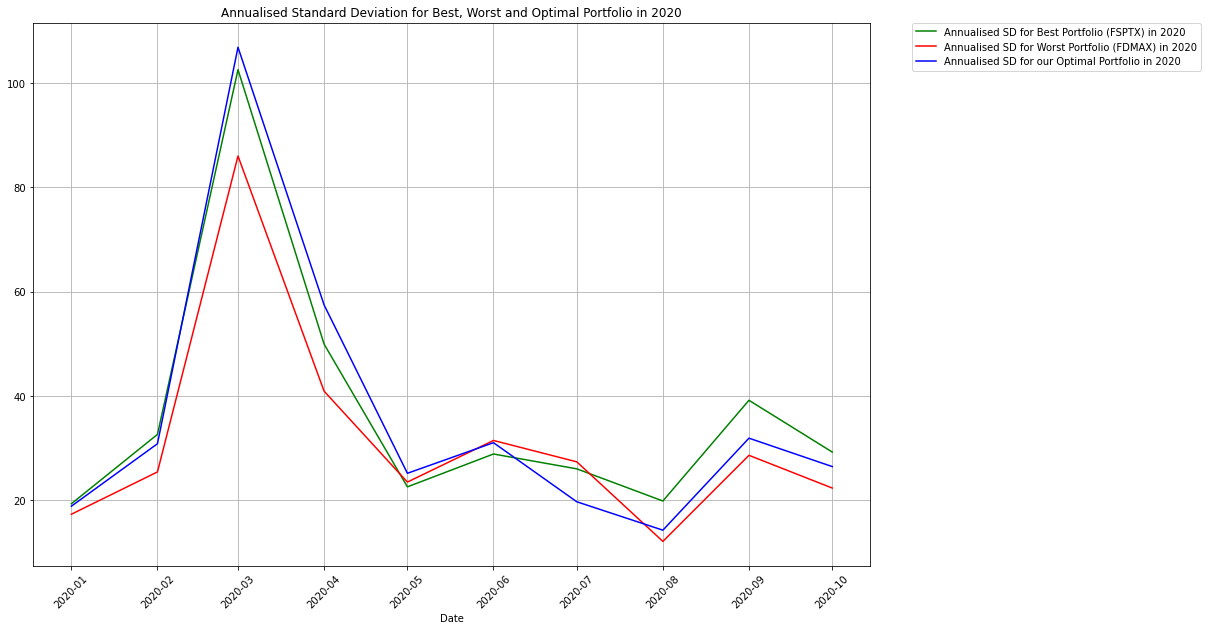

In [42]:
plt.figure(figsize=(15,10))
plt.plot(returns_df_best['Date'], combined_df_sd['Annualised SD for Best'], 'g', label='Annualised SD for Best Portfolio (FSPTX) in 2020')
plt.plot(returns_df_worst['Date'], combined_df_sd['Annualised SD for Worst'], 'r', label='Annualised SD for Worst Portfolio (FDMAX) in 2020')
plt.plot(returns_df_optimal['Date'], combined_df_sd['Annualised SD for Optimal'], 'b', label='Annualised SD for our Optimal Portfolio in 2020')
plt.grid(True)
plt.xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Annualised Standard Deviation for Best, Worst and Optimal Portfolio in 2020')
plt.show()

## SD of optimal portfolio (after adjustment) for Oct 2020

In [43]:
tickers_optimal = ["AAPL", "MSFT", "MA", "V", "FIS", "LRCX", "FB", "QCOM", "INTU", "AMD", "MELI", "G", "MDB", "NXPI"]
returns_df_optimal_daily = get_data_for_multiple_stocks_daily(tickers_optimal,
                                          start_date = "2020-09-30", end_date = "2020-10-31")

In [44]:
returns_df_optimal_daily.dropna(inplace = True)
returns_df_optimal_daily.reset_index(inplace=True)

In [45]:
returns_df_optimal_daily["portfolio return"]=0

optimal_weights_after = [0.0609385, 0.1295965999999999998, 0.1334389499999999997, 0.137560,0.074765,
                   0.070833, 0.0556545, 0.040578, 0.119718, 0.0383979,
                   0.016148, 0.044405,0.015470, 0.072358]
for i in range(len(tickers_optimal)):
    returns_df_optimal_daily["portfolio return"]+=optimal_weights_after[i]*(np.exp(returns_df_optimal_daily[tickers_optimal[i]+" log_returns"]) - 1)

returns_df_optimal_daily["portfolio return"]=np.log(1+returns_df_optimal_daily["portfolio return"])

In [46]:
dates = ["2020-09-30", "2020-10-31"]
sd_optimal_monthly = []
for i in range(len(dates)-1):
    sd_optimal_monthly.append(np.std(np.exp(returns_df_optimal_daily.loc[(returns_df_optimal_daily['Date'] > dates[i]) & 
                                                      (returns_df_optimal_daily['Date'] <= dates[i+1])]['portfolio return'])-1))
sd_optimal_monthly

[0.017000509109897404]

In [47]:
sd_optimal = pd.Series(sd_optimal_monthly)*np.sqrt(252)*100

In [48]:
sd_optimal

0    26.987472
dtype: float64

# Question 3

## Best portfolio

In [49]:
tickers_best_sept=["MSFT" ,"AAPL", "MA" ,"NVDA",  "CRM" , "PYPL" , "FIS" , "UBER", "MRVL", "NLOK" ,"JBL" , "FLEX", "FB","ADSK","G" ,"WDAY", "MU","ADBE","ESTC","ZEN" ,"ORCL", "SVMK","AMD" ,"EXPE" ,"RUN" ,"NXPI" ,"QCOM","AAXN" ,"LPSN"]

array_of_values_best_sept=[1780998721 ,936611985 ,461039335 ,341915735 ,277303472  ,235332632 ,201563907 ,182742766 ,170271474 
,155197689 ,152718712 ,143081280 ,138545100 ,135672173 ,135133130 ,126272705 ,116315224 ,113504629,110101745 
,108405636 ,105555570 ,104330457 ,101315043,99841241 ,99840948,96667217 ,95697376,94690800 
,90612227]

In [50]:
##VSLR have NA values for nov so we use 31st stock to replace which is ON


In [51]:
returns_df_best_sept = get_data_for_multiple_stocks_monthly(tickers_best_sept,
                                          start_date = "2020-09-01", end_date = "2020-11-08")
returns_df_best_sept

,MSFT adj_close,MSFT prev_close,MSFT log_returns,AAPL adj_close,AAPL prev_close,AAPL log_returns,MA adj_close,MA prev_close,MA log_returns,NVDA adj_close,...,NXPI log_returns,QCOM adj_close,QCOM prev_close,QCOM log_returns,AAXN adj_close,AAXN prev_close,AAXN log_returns,LPSN adj_close,LPSN prev_close,LPSN log_returns
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-01,210.330002,NaN,NaN,115.610542,NaN,NaN,337.776672,NaN,NaN,541.058105,...,NaN,117.053070,NaN,NaN,90.699997,NaN,NaN,51.990002,NaN,NaN
2020-10-01,202.470001,210.330002,-0.038086,108.672516,115.610542,-0.061888,288.304291,337.776672,-0.158368,501.359985,...,0.082381,123.360001,117.053070,0.052479,98.900002,90.699997,0.086552,53.459999,51.990002,0.027882
2020-11-01,211.009995,202.470001,0.041314,115.770271,108.672516,0.063269,334.779999,288.304291,0.149457,510.799988,...,0.037192,140.110001,123.360001,0.127321,119.000000,98.900002,0.185014,50.230000,53.459999,-0.062321


In [52]:
#returns_df_best_sept.dropna(inplace = True)
returns_df_best_sept.reset_index(inplace=True)

In [53]:
array_price=[]
for i in range(len(tickers_best_sept)):
    x=returns_df_best_sept.loc[returns_df_best_sept['Date']=='2020-10-01'][tickers_best_sept[i]+' prev_close'].values
    array_price.append(x)
shares=[]
for i in range(len(array_price)):
    shares.append(np.round(array_of_values_best_sept[i]/array_price[i],0)[0])

print(shares)
#values = total=sum of adj close price*num of shares  for all stocks


total=0
for y in range(len(shares)):
    total+=(returns_df_best_sept[tickers_best_sept[y]+" prev_close"]*shares[y])
    
for y in range(len(shares)):
    returns_df_best_sept["value"]=total
    
#weigts is the weights of stocks in portfolio for each day

for x in range(len(shares)):
    returns_df_best_sept[tickers_best_sept[x]+"_weight"]=(returns_df_best_sept[tickers_best_sept[x]+" prev_close"]*shares[x])/total

[8467640.0, 8101441.0, 1364924.0, 631939.0, 1103388.0, 1194400.0, 1372462.0, 5009396.0, 4295000.0, 7447106.0, 4457639.0, 12843921.0, 529000.0, 587300.0, 3478133.0, 586960.0, 2476900.0, 231439.0, 1020500.0, 1053300.0, 1775259.0, 4718700.0, 1235700.0, 1088900.0, 1295458.0, 776850.0, 817555.0, 1044000.0, 1742878.0]


In [54]:
returns_df_best_sept["portfolio return"]=0
for i in range(len(tickers_best_sept)):
    returns_df_best_sept["portfolio return"]+=returns_df_best_sept[tickers_best_sept[i]+"_weight"]*(np.exp(returns_df_best_sept[tickers_best_sept[i]+" log_returns"]) - 1)

returns_df_best_sept["portfolio return"]=np.log(1+returns_df_best_sept["portfolio return"])

returns_df_best_sept

,Date,MSFT adj_close,MSFT prev_close,MSFT log_returns,AAPL adj_close,AAPL prev_close,AAPL log_returns,MA adj_close,MA prev_close,MA log_returns,...,ORCL_weight,SVMK_weight,AMD_weight,EXPE_weight,RUN_weight,NXPI_weight,QCOM_weight,AAXN_weight,LPSN_weight,portfolio return
0,2020-09-01,210.330002,NaN,NaN,115.610542,NaN,NaN,337.776672,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-01,202.470001,210.330002,-0.038086,108.672516,115.610542,-0.061888,288.304291,337.776672,-0.158368,...,0.015273,0.015096,0.014659,0.014446,0.014446,0.013987,0.013847,0.013701,0.013111,-0.046427
2,2020-11-01,211.009995,202.470001,0.041314,115.770271,108.672516,0.063269,334.779999,288.304291,0.149457,...,0.015037,0.014969,0.014101,0.015539,0.010214,0.015910,0.015286,0.015650,0.014122,0.069467


## Worst portfolio

In [ ]:
returns_df_worst_qn3 = get_data_for_multiple_stocks_monthly(tickers_worst,
                                          start_date = "2020-07-01", end_date = "2020-10-31")

In [ ]:
returns_df_worst_qn3.dropna(inplace = True)
returns_df_worst_qn3.reset_index(inplace=True)
returns_df_worst_qn3

In [55]:
shares = [361221, 114105, 64490, 6323, 15611, 35750, 5253, 7575, 21379, 41553, 8007, 2212, 29260, 6749, 15481, 15542,
         38703, 5611, 0, 0, 4258, 20454, 10168, 25461, 14415, 1626, 0, 2164, 1733, 0]

# values = sum of adj close price*num of shares for all stocks

total=0
for y in range(len(shares)):
    total+=(returns_df_worst_qn3[tickers_worst[y]+" prev_close"]*shares[y])
    
for y in range(len(shares)):
    returns_df_worst_qn3["value"]=total

for x in range(len(shares)):
    returns_df_worst_qn3[tickers_worst[x]+"_weight"]=(returns_df_worst_qn3[tickers_worst[x]+" prev_close"]*shares[x])/total
    
#returns monthly returns from july 2020 to oct 2020
returns_df_worst_qn3["portfolio return"]=0
for i in range(len(tickers_worst)):
    returns_df_worst_qn3["portfolio return"]+=returns_df_worst_qn3[tickers_worst[i]+"_weight"]*(np.exp(returns_df_worst_qn3[tickers_worst[i]+" log_returns"]) - 1)

returns_df_worst_qn3["portfolio return"]=np.log(1+returns_df_worst_qn3["portfolio return"])
returns_df_worst_qn3

,Date,ERIC adj_close,ERIC prev_close,ERIC log_returns,NOK adj_close,NOK prev_close,NOK log_returns,CSCO adj_close,CSCO prev_close,CSCO log_returns,...,HLIT_weight,ADTN_weight,EXTR_weight,INSG_weight,RPD_weight,SW.TO_weight,CVLT_weight,GLW_weight,RBBN_weight,portfolio return
0,2020-08-01,11.559068,11.459848,0.008621,4.90,4.78,0.024795,41.834137,46.304768,-0.101532,...,0.006551,0.007195,0.006649,0.011153,0.005559,0.0,0.005475,0.003063,0.0,-0.020852
1,2020-09-01,10.805000,11.559068,-0.067461,3.91,4.90,-0.225698,39.029999,41.834137,-0.069382,...,0.007072,0.006559,0.006521,0.009698,0.006153,0.0,0.005483,0.003275,0.0,-0.096210
2,2020-10-01,11.122502,10.805000,0.028961,3.37,3.91,-0.148625,35.571899,39.029999,-0.092775,...,0.007364,0.006731,0.006604,0.009599,0.006425,0.0,0.005697,0.003624,0.0,-0.000708


# Question 4

In [56]:
def get_data_for_multiple_stocks_price(tickers, start_date, end_date):
    
    stocks = dict()
    
    for ticker in tickers:
        
        # get the data for the specific ticker
        s = DataReader(ticker, 'yahoo', start_date, end_date)
        
        s['Adj Close'] = s['Adj Close']
        # s['log_return'] = np.log(s['Adj Close']/s['Prev Close'])
        # s['perc_return'] = (s['Adj Close']/s['Prev Close'])
        
        # add to the dictionary
        stocks[ticker] = s[['Adj Close']]
    
    # return the dictionary
    return stocks

In [57]:
tickers_optimal = ["AAPL", "MSFT", "MA", "V", "FIS", "LRCX", "FB", "QCOM", "INTU", "AMD", "MELI", "G", "MDB", "NXPI"]
price_optimal_df = get_data_for_multiple_stocks_price(tickers_optimal, "2019-12-30", "2019-12-31")
price_optimal_df

{'AAPL':             Adj Close
 Date                 
 2019-12-30  71.669212
 2019-12-31  72.192863,
 'MSFT':              Adj Close
 Date                  
 2019-12-30  156.346298
 2019-12-31  156.455429,
 'MA':              Adj Close
 Date                  
 2019-12-30  296.123474
 2019-12-31  296.988831,
 'V':              Adj Close
 Date                  
 2019-12-30  186.962204
 2019-12-31  187.031860,
 'FIS':              Adj Close
 Date                  
 2019-12-30  137.567566
 2019-12-31  138.053894,
 'LRCX':              Adj Close
 Date                  
 2019-12-30  288.528290
 2019-12-31  288.390167,
 'FB':              Adj Close
 Date                  
 2019-12-30  204.410004
 2019-12-31  205.250000,
 'QCOM':             Adj Close
 Date                 
 2019-12-30  86.594490
 2019-12-31  86.398636,
 'INTU':              Adj Close
 Date                  
 2019-12-30  260.856781
 2019-12-31  259.953674,
 'AMD':             Adj Close
 Date                 
 2019-12-30  45.52

In [58]:
for i in range(len(tickers_optimal)):
    price_optimal_df[tickers_optimal[i]].reset_index(inplace=True)

In [59]:
# check for one stock
price_optimal_df
price_optimal_df['AAPL']['Adj Close'][1]

72.19286346435547

In [60]:
dollarValueOfStock = [2051836821, 1624363933, 329525040, 291785537, 238343597, 219364830, 212343810, 186230240, 185088374, 179336117, 165346944, 162171231, 161982940, 145298238, 121981574, 119200951,116143756, 112774797, 108946944,108161967, 105879493, 99706579, 98161895, 88818510, 83373164, 76143081, 74428092, 69989115, 66668202, 61789443]
arrOfStocks = ["AAPL", "MSFT", "ADBE", "CRM", "NVDA", "MA", "PYPL", "V", "MU", "FIS", "LRCX", "FB", "AMAT", "QCOM", "TWLO", "WDAY", "AMZN", "INTU", "ADSK", "AMD","HUBS", "MELI", "ESTC", "G", "GDDY", "FLEX", "MDB", "NXPI", "FISV", "MRVL"]
stock_adj_close = [106.06875610351562,204.51560974121094, 444.32000732421875,194.85000610351562,424.4630126953125,308.171142578125,196.07000732421875,
 190.1125946044922,50.060001373291016,145.9651641845703,375.7033996582031,253.6699981689453,64.11695861816406,105.04737091064453,
 277.4200134277344,180.9199981689453,3164.679931640625,305.83026123046875,236.42999267578125,77.43000030517578,234.61000061035156,1124.6199951171875,
 96.19000244140625,39.71950149536133,70.27999877929688,11.489999771118164,229.0800018310547,117.17669677734375,
 99.79000091552734,36.41865921020508]
tickers_optimal = ["AAPL", "MSFT", "MA", "V", "FIS", "LRCX", "FB", "QCOM", "INTU", "AMD", "MELI", "G", "MDB", "NXPI"]


shares = []
for j in tickers_optimal:
    for i in range(len(dollarValueOfStock)):
        if j == arrOfStocks[i]:
            share = dollarValueOfStock[i]/price_optimal_df[j]['Adj Close'][1]
            shares.append(share)
shares

[28421601.83898336,
 10382279.110295517,
 738629.8992512122,
 995713.9903861529,
 1299029.7611176567,
 573344.5962618502,
 790115.6199756395,
 1681719.121448633,
 433826.5165766981,
 2358525.197568043,
 174330.4867195658,
 2122457.267145824,
 565520.0338487498,
 555920.566139338]

In [61]:
tickers_optimal = ["AAPL", "MSFT", "MA", "V", "FIS", "LRCX", "FB", "QCOM", "INTU", "AMD", "MELI", "G", "MDB", "NXPI"]
value = 0
for i in range(len(tickers_optimal)):
    value += shares[i]*price_optimal_df[tickers_optimal[i]]['Adj Close'][1]
portfolio_value_dec19 = value
portfolio_value_dec19

5287827414.0

## Portfolio VaR

In [62]:
def get_data_for_multiple_stocks2(tickers, start_date, end_date):
    
    stocks = dict()
    
    for ticker in tickers:
        
        # get the data for the specific ticker
        s = DataReader(ticker, 'yahoo', start_date, end_date)
      
        s['Prev Close'] = s['Adj Close'].shift(1)
        s['log_return'] = np.log(s['Adj Close']/s['Prev Close'])
        s['perc_return'] = (s['Adj Close']/s['Prev Close'])
        
        # add to the dictionary
        stocks[ticker] = s
    
    # return the dictionary
    return stocks

In [63]:
tickers_opt_string = ["AAPL", "MSFT", "MA", "V", "FIS", "LRCX", "FB", "QCOM", "INTU", "AMD", "MELI", "G", "MDB", "NXPI"]
stocks = get_data_for_multiple_stocks2(tickers_opt_string, start_date = "2019-01-01", end_date = "2020-11-01")

AAPL = stocks['AAPL'].reset_index()
MSFT = stocks['MSFT'].reset_index()
MA = stocks['MA'].reset_index()
V = stocks['V'].reset_index()
FIS = stocks['FIS'].reset_index()
LRCX = stocks['LRCX'].reset_index()
FB = stocks['FB'].reset_index()
QCOM = stocks['QCOM'].reset_index()
INTU = stocks['INTU'].reset_index()
AMD = stocks['AMD'].reset_index()
MELI = stocks['MELI'].reset_index()
G = stocks['G'].reset_index()
MDB = stocks['MDB'].reset_index()
NXPI = stocks['NXPI'].reset_index()

# Transform Date from integer to date type
AAPL['Date'] = AAPL['Date'].apply(str)
AAPL['Date'] = pd.to_datetime(AAPL['Date'], infer_datetime_format=True)

MSFT['Date'] = MSFT['Date'].apply(str)
MSFT['Date'] = pd.to_datetime(MSFT['Date'], infer_datetime_format=True)

MA['Date'] = MA['Date'].apply(str)
MA['Date'] = pd.to_datetime(MA['Date'], infer_datetime_format=True)

V['Date'] = V['Date'].apply(str)
V['Date'] = pd.to_datetime(V['Date'], infer_datetime_format=True)

FIS['Date'] = FIS['Date'].apply(str)
FIS['Date'] = pd.to_datetime(FIS['Date'], infer_datetime_format=True)

LRCX['Date'] = LRCX['Date'].apply(str)
LRCX['Date'] = pd.to_datetime(LRCX['Date'], infer_datetime_format=True)

FB['Date'] = FB['Date'].apply(str)
FB['Date'] = pd.to_datetime(FB['Date'], infer_datetime_format=True)

QCOM['Date'] = QCOM['Date'].apply(str)
QCOM['Date'] = pd.to_datetime(QCOM['Date'], infer_datetime_format=True)

INTU['Date'] = INTU['Date'].apply(str)
INTU['Date'] = pd.to_datetime(INTU['Date'], infer_datetime_format=True)

AMD['Date'] = AMD['Date'].apply(str)
AMD['Date'] = pd.to_datetime(AMD['Date'], infer_datetime_format=True)

MELI['Date'] = MELI['Date'].apply(str)
MELI['Date'] = pd.to_datetime(MELI['Date'], infer_datetime_format=True)

G['Date'] = G['Date'].apply(str)
G['Date'] = pd.to_datetime(G['Date'], infer_datetime_format=True)

MDB['Date'] = MDB['Date'].apply(str)
MDB['Date'] = pd.to_datetime(MDB['Date'], infer_datetime_format=True)

NXPI['Date'] = NXPI['Date'].apply(str)
NXPI['Date'] = pd.to_datetime(NXPI['Date'], infer_datetime_format=True)

In [64]:
# Renaming adj_close column
AAPL.rename(columns={'Adj Close':'AAPL_Adj Close'}, inplace=True)
MSFT.rename(columns={'Adj Close':'MSFT_Adj Close'}, inplace=True)
MA.rename(columns={'Adj Close':'MA_Adj Close'}, inplace=True)
V.rename(columns={'Adj Close':'V_Adj Close'}, inplace=True)
FIS.rename(columns={'Adj Close':'FIS_Adj Close'}, inplace=True)
LRCX.rename(columns={'Adj Close':'LRCX_Adj Close'}, inplace=True)
FB.rename(columns={'Adj Close':'FB_Adj Close'}, inplace=True)
QCOM.rename(columns={'Adj Close':'QCOM_Adj Close'}, inplace=True)
INTU.rename(columns={'Adj Close':'INTU_Adj Close'}, inplace=True)
AMD.rename(columns={'Adj Close':'AMD_Adj Close'}, inplace=True)
MELI.rename(columns={'Adj Close':'MELI_Adj Close'}, inplace=True)
G.rename(columns={'Adj Close':'G_Adj Close'}, inplace=True)
MDB.rename(columns={'Adj Close':'MDB_Adj Close'}, inplace=True)
NXPI.rename(columns={'Adj Close':'NXPI_Adj Close'}, inplace=True)

In [65]:
# Renaming log_return column
AAPL.rename(columns={'log_return':'AAPL_log_return'}, inplace=True)
MSFT.rename(columns={'log_return':'MSFT_log_return'}, inplace=True)
MA.rename(columns={'log_return':'MA_log_return'}, inplace=True)
V.rename(columns={'log_return':'V_log_return'}, inplace=True)
FIS.rename(columns={'log_return':'FIS_log_return'}, inplace=True)
LRCX.rename(columns={'log_return':'LRCX_log_return'}, inplace=True)
FB.rename(columns={'log_return':'FB_log_return'}, inplace=True)
QCOM.rename(columns={'log_return':'QCOM_log_return'}, inplace=True)
INTU.rename(columns={'log_return':'INTU_log_return'}, inplace=True)
AMD.rename(columns={'log_return':'AMD_log_return'}, inplace=True)
MELI.rename(columns={'log_return':'MELI_log_return'}, inplace=True)
G.rename(columns={'log_return':'G_log_return'}, inplace=True)
MDB.rename(columns={'log_return':'MDB_log_return'}, inplace=True)
NXPI.rename(columns={'log_return':'NXPI_log_return'}, inplace=True)

In [66]:
# Create a new dataset for portfolio
dfs = [AAPL, MSFT, MA, V, FIS, LRCX, FB, QCOM, INTU, AMD, MELI, G, MDB, NXPI]
portfolio_opt = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)
portfolio_opt = portfolio_opt[['Date', 'AAPL_Adj Close', 'MSFT_Adj Close','MA_Adj Close','V_Adj Close','FIS_Adj Close','LRCX_Adj Close','FB_Adj Close','QCOM_Adj Close','INTU_Adj Close','AMD_Adj Close','MELI_Adj Close','G_Adj Close','MDB_Adj Close','NXPI_Adj Close','AAPL_log_return','MSFT_log_return','MA_log_return','V_log_return','FIS_log_return','LRCX_log_return','FB_log_return','QCOM_log_return','INTU_log_return','AMD_log_return','MELI_log_return','G_log_return','MDB_log_return','NXPI_log_return']]

portfolio_opt.dropna(inplace=True)


In [67]:
portfolio_opt

,Date,AAPL_Adj Close,MSFT_Adj Close,MA_Adj Close,V_Adj Close,FIS_Adj Close,LRCX_Adj Close,FB_Adj Close,QCOM_Adj Close,INTU_Adj Close,...,FIS_log_return,LRCX_log_return,FB_log_return,QCOM_log_return,INTU_log_return,AMD_log_return,MELI_log_return,G_log_return,MDB_log_return,NXPI_log_return
1,2019-01-02,38.249401,98.860214,187.678177,131.462326,99.532082,133.541534,135.679993,54.205219,191.487595,...,-0.010982,0.015521,0.034415,0.008573,-0.012164,0.019845,0.017467,-0.007438,-0.046315,0.023600
2,2019-01-03,34.439476,95.223351,179.211197,126.724884,96.470459,127.101006,131.740005,52.599842,185.628830,...,-0.031243,-0.049430,-0.029469,-0.030064,-0.031074,-0.099301,-0.004776,-0.013529,-0.052116,-0.041638
3,2019-01-04,35.909672,99.652115,187.697968,132.184341,99.875542,133.309784,137.949997,53.449738,192.994125,...,0.034688,0.047694,0.046061,0.016029,0.038911,0.108289,0.061269,0.025403,0.074136,0.047221
4,2019-01-07,35.829746,99.779205,189.142090,134.567917,100.503555,134.497452,138.050003,53.298649,195.938248,...,0.006268,0.008870,0.000725,-0.002831,0.015140,0.079395,0.042256,0.007716,0.047432,0.007395
5,2019-01-08,36.512772,100.502670,190.519348,135.299805,101.259148,132.218643,142.529999,52.835922,200.635086,...,0.007490,-0.017088,0.031937,-0.008720,0.023688,0.008713,-0.001369,0.017057,0.048846,0.005641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,2020-10-26,114.851852,210.080002,318.059998,193.070007,139.419998,347.630005,277.109985,126.199997,328.089996,...,-0.035096,-0.017932,-0.027338,-0.021014,-0.019110,0.003289,-0.023690,-0.039978,-0.032373,-0.016834
460,2020-10-27,116.399178,213.250000,317.109985,190.059998,137.860001,343.829987,283.290009,125.910004,330.269989,...,-0.011252,-0.010991,0.022057,-0.002301,0.006623,-0.041593,0.000803,-0.007057,0.016154,-0.012383
461,2020-10-28,111.008476,202.679993,291.380005,180.869995,132.509995,338.899994,267.670013,121.580002,318.510010,...,-0.039581,-0.014442,-0.056716,-0.034995,-0.036257,-0.031945,-0.006948,-0.037228,-0.016404,-0.026313
462,2020-10-29,115.121384,204.720001,293.179993,184.869995,125.019997,353.260010,280.829987,126.440002,325.609985,...,-0.058184,0.041499,0.047995,0.039195,0.022046,0.020982,0.021278,0.006448,-0.018288,0.048140


In [68]:
 portfolio_opt['Portfolio_Value']=0
for i in range(len(shares)):
    portfolio_opt['Portfolio_Value'] += portfolio_opt[tickers_optimal[i]+'_Adj Close']*np.round(shares[i],0) 
    
    #portfolio_opt['MSFT_Adj Close']*0.092569 + portfolio_opt['MA_Adj Close']*0.156987 + portfolio_opt['V_Adj Close']*0.137560 + portfolio_opt['FIS_Adj Close']*0.074765 + portfolio_opt['LRCX_Adj Close']*0.050595 + portfolio_opt['FB_Adj Close']*0.000872 + portfolio_opt['QCOM_Adj Close']*0.040578 + portfolio_opt['INTU_Adj Close']*0.199530 + portfolio_opt['AMD_Adj Close']*0.045174 + portfolio_opt['MELI_Adj Close']*0.016148 + portfolio_opt['G_Adj Close']*0.044405 + portfolio_opt['MDB_Adj Close']*0.015470 + portfolio_opt['NXPI_Adj Close']*0.072358
portfolio_opt['log_return'] = np.log(portfolio_opt['Portfolio_Value']/portfolio_opt['Portfolio_Value'].shift(1))
portfolio_opt


,Date,AAPL_Adj Close,MSFT_Adj Close,MA_Adj Close,V_Adj Close,FIS_Adj Close,LRCX_Adj Close,FB_Adj Close,QCOM_Adj Close,INTU_Adj Close,...,FB_log_return,QCOM_log_return,INTU_log_return,AMD_log_return,MELI_log_return,G_log_return,MDB_log_return,NXPI_log_return,Portfolio_Value,log_return
1,2019-01-02,38.249401,98.860214,187.678177,131.462326,99.532082,133.541534,135.679993,54.205219,191.487595,...,0.034415,0.008573,-0.012164,0.019845,0.017467,-0.007438,-0.046315,0.023600,3.108594e+09,NaN
2,2019-01-03,34.439476,95.223351,179.211197,126.724884,96.470459,127.101006,131.740005,52.599842,185.628830,...,-0.029469,-0.030064,-0.031074,-0.099301,-0.004776,-0.013529,-0.052116,-0.041638,2.926400e+09,-0.060398
3,2019-01-04,35.909672,99.652115,187.697968,132.184341,99.875542,133.309784,137.949997,53.449738,192.994125,...,0.046061,0.016029,0.038911,0.108289,0.061269,0.025403,0.074136,0.047221,3.057864e+09,0.043944
4,2019-01-07,35.829746,99.779205,189.142090,134.567917,100.503555,134.497452,138.050003,53.298649,195.938248,...,0.000725,-0.002831,0.015140,0.079395,0.042256,0.007716,0.047432,0.007395,3.072014e+09,0.004617
5,2019-01-08,36.512772,100.502670,190.519348,135.299805,101.259148,132.218643,142.529999,52.835922,200.635086,...,0.031937,-0.008720,0.023688,0.008713,-0.001369,0.017057,0.048846,0.005641,3.109145e+09,0.012014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,2020-10-26,114.851852,210.080002,318.059998,193.070007,139.419998,347.630005,277.109985,126.199997,328.089996,...,-0.027338,-0.021014,-0.019110,0.003289,-0.023690,-0.039978,-0.032373,-0.016834,7.530051e+09,-0.015019
460,2020-10-27,116.399178,213.250000,317.109985,190.059998,137.860001,343.829987,283.290009,125.910004,330.269989,...,0.022057,-0.002301,0.006623,-0.041593,0.000803,-0.007057,0.016154,-0.012383,7.597413e+09,0.008906
461,2020-10-28,111.008476,202.679993,291.380005,180.869995,132.509995,338.899994,267.670013,121.580002,318.510010,...,-0.056716,-0.034995,-0.036257,-0.031945,-0.006948,-0.037228,-0.016404,-0.026313,7.257499e+09,-0.045773
462,2020-10-29,115.121384,204.720001,293.179993,184.869995,125.019997,353.260010,280.829987,126.440002,325.609985,...,0.047995,0.039195,0.022046,0.020982,0.021278,0.006448,-0.018288,0.048140,7.431202e+09,0.023652


In [69]:
mean_log_returns = portfolio_opt[['AAPL_log_return','MSFT_log_return','MA_log_return','V_log_return','FIS_log_return','LRCX_log_return','FB_log_return','QCOM_log_return','INTU_log_return','AMD_log_return','MELI_log_return','G_log_return','MDB_log_return','NXPI_log_return']].mean()
mean_log_returns

AAPL_log_return    0.002258
MSFT_log_return    0.001539
MA_log_return      0.000942
V_log_return       0.000715
FIS_log_return     0.000461
LRCX_log_return    0.002065
FB_log_return      0.001505
QCOM_log_return    0.001795
INTU_log_return    0.001047
AMD_log_return     0.003036
MELI_log_return    0.003071
G_log_return       0.000558
MDB_log_return     0.002168
NXPI_log_return    0.001370
dtype: float64

In [70]:
# optimized weights
weights = np.array([0.052990, 0.092569, 0.156987, 0.137560, 0.074765, 0.050595, 0.000872, 0.040578, 0.199530, 0.045174, 0.016148, 0.044405, 0.015470, 0.072358])

In [71]:
portfolio_2019=portfolio_opt[portfolio_opt['Date']<"2020-01-01"]
portfolio_2020=portfolio_opt[portfolio_opt['Date']>"2020-01-01"]


In [72]:
alpha = 0.05
z_alpha = norm.ppf(alpha, loc=0, scale=1) # z-score

mean_log_returns = portfolio_2019[['AAPL_log_return','MSFT_log_return','MA_log_return','V_log_return','FIS_log_return','LRCX_log_return','FB_log_return','QCOM_log_return','INTU_log_return','AMD_log_return','MELI_log_return','G_log_return','MDB_log_return','NXPI_log_return']].mean()
mean_arith_returns =  np.exp(mean_log_returns.values) - 1 # convert to arithmetic to find weighted returns
weighted_arith_returns = np.dot(weights, mean_arith_returns)
weighted_log_returns = np.log(1 + weighted_arith_returns) # convert back to log
mu = weighted_log_returns

mat_df = portfolio_2019[['AAPL_log_return','MSFT_log_return','MA_log_return','V_log_return','FIS_log_return','LRCX_log_return','FB_log_return','QCOM_log_return','INTU_log_return','AMD_log_return','MELI_log_return','G_log_return','MDB_log_return','NXPI_log_return']].values
vcv = np.cov(mat_df.T)
variance = np.dot(weights, np.dot(vcv, weights))
sigma = sqrt(variance)       


VaR_95 = mu + sigma*z_alpha
VaR_95_arith = 1-np.exp(VaR_95)
VaR_95_dollar = VaR_95_arith*portfolio_value_dec19
print(VaR_95_arith)
print(VaR_95_dollar)

0.017727528412736726
93740110.72333317


In [73]:
returns_index_VGT= get_data_for_multiple_stocks2(["VGT"],"2019-11-30", "2019-12-31")
returns_index_VGT = returns_index_VGT["VGT"]
returns_index_VGT

,High,Low,Open,Close,Volume,Adj Close,Prev Close,log_return,perc_return
Date,,,,,,,,,
2019-11-29,236.869995,236.080002,236.479996,236.149994,189500.0,233.468948,NaN,NaN,NaN
2019-12-02,236.490005,231.729996,236.419998,232.789993,515600.0,230.147095,233.468948,-0.014330,0.985772
2019-12-03,231.009995,228.009995,228.990005,230.940002,578900.0,228.318100,230.147095,-0.007979,0.992053
2019-12-04,232.500000,231.410004,232.320007,231.720001,522700.0,229.089249,228.318100,0.003372,1.003378
2019-12-05,232.759995,231.399994,232.520004,232.360001,354000.0,229.721985,229.089249,0.002758,1.002762
2019-12-06,235.070007,233.990005,234.199997,234.910004,390100.0,232.243042,229.721985,0.010915,1.010974
2019-12-09,235.149994,233.580002,234.550003,233.699997,305000.0,231.046768,232.243042,-0.005164,0.994849
2019-12-10,234.770004,233.210007,233.949997,233.600006,730300.0,230.947906,231.046768,-0.000428,0.999572
2019-12-11,235.250000,233.639999,234.199997,235.139999,342100.0,232.470413,230.947906,0.006571,1.006592


In [74]:
returns_index_SP = get_data_for_multiple_stocks2(["^GSPC"],"2019-11-30", "2019-12-31")
returns_index_SP  = returns_index_SP["^GSPC"]
returns_index_SP 

,High,Low,Open,Close,Volume,Adj Close,Prev Close,log_return,perc_return
Date,,,,,,,,,
2019-11-29,3150.300049,3139.340088,3147.179932,3140.979980,1743020000,3140.979980,NaN,NaN,NaN
2019-12-02,3144.310059,3110.780029,3143.850098,3113.870117,3268740000,3113.870117,3140.979980,-0.008668,0.991369
2019-12-03,3094.969971,3070.330078,3087.409912,3093.199951,3653390000,3093.199951,3113.870117,-0.006660,0.993362
2019-12-04,3119.379883,3102.530029,3103.500000,3112.760010,3695030000,3112.760010,3093.199951,0.006304,1.006324
2019-12-05,3119.449951,3103.760010,3119.209961,3117.429932,3355750000,3117.429932,3112.760010,0.001499,1.001500
2019-12-06,3150.600098,3134.620117,3134.620117,3145.909912,3479480000,3145.909912,3117.429932,0.009094,1.009136
2019-12-09,3148.870117,3135.459961,3141.860107,3135.959961,3345990000,3135.959961,3145.909912,-0.003168,0.996837
2019-12-10,3142.120117,3126.090088,3135.360107,3132.520020,3343790000,3132.520020,3135.959961,-0.001098,0.998903
2019-12-11,3143.979980,3133.209961,3135.750000,3141.629883,3252540000,3141.629883,3132.520020,0.002904,1.002908


In [75]:
returns_index_IYW = get_data_for_multiple_stocks2(["IYW"],"2019-11-30", "2019-12-31")
returns_index_IYW  = returns_index_IYW["IYW"]
returns_index_IYW

,High,Low,Open,Close,Volume,Adj Close,Prev Close,log_return,perc_return
Date,,,,,,,,,
2019-11-29,224.460007,223.679993,224.089996,223.679993,19900.0,221.800751,NaN,NaN,NaN
2019-12-02,223.970001,219.619995,223.970001,220.539993,138200.0,218.687134,221.800751,-0.014137,0.985962
2019-12-03,219.020004,216.199997,216.880005,219.020004,119400.0,217.179932,218.687134,-0.006916,0.993108
2019-12-04,220.740005,219.979996,220.229996,220.139999,79000.0,218.290497,217.179932,0.005101,1.005114
2019-12-05,221.320007,219.960007,221.160004,220.839996,95000.0,218.984619,218.290497,0.003175,1.003180
2019-12-06,223.570007,222.389999,222.440002,223.360001,122400.0,221.483459,218.984619,0.011346,1.011411
2019-12-09,223.960007,222.360001,222.740005,222.369995,53700.0,220.501755,221.483459,-0.004442,0.995568
2019-12-10,223.639999,222.050003,222.580002,222.610001,67200.0,220.739746,220.501755,0.001079,1.001079
2019-12-11,224.029999,222.669998,222.990005,223.839996,41100.0,221.959412,220.739746,0.005510,1.005525


In [76]:
returns_index_IYW.reset_index(inplace=True)
returns_index_SP.reset_index(inplace=True)
returns_index_VGT.reset_index(inplace=True)

In [77]:
def OLS(returns_index):
    date = returns_index[returns_index['Date'] >= "2019-12-01"]['Date']
    port_return = portfolio_2019[portfolio_2019['Date'] >= "2019-12-01"]['log_return']
    mkt_return =returns_index[returns_index['Date'] >= "2019-12-01"]['log_return']

    #assume annual rF is 2% log return 
    df = pd.DataFrame({'Date': date, 'Portfolio Returns': port_return.values, 'Index Returns': mkt_return.values, 'Risk Free Rate': (0.02/252)})
    df['Ri - Rf'] = df['Portfolio Returns'] - df['Risk Free Rate']
    df['Rm - Rf'] = df['Index Returns'] - df['Risk Free Rate']
    df['const'] = 1.0
    
    print(sm.OLS(df['Ri - Rf'], df[['const','Rm - Rf']]).fit().summary())
    
    return df

In [78]:
VGT=OLS(returns_index_VGT)

                            OLS Regression Results                            
Dep. Variable:                Ri - Rf   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     268.3
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.16e-12
Time:                        00:09:45   Log-Likelihood:                 103.83
No. Observations:                  21   AIC:                            -203.7
Df Residuals:                      19   BIC:                            -201.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      2.121      0.0

In [79]:
SP=OLS(returns_index_SP)

                            OLS Regression Results                            
Dep. Variable:                Ri - Rf   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     78.32
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           3.62e-08
Time:                        00:09:45   Log-Likelihood:                 92.462
No. Observations:                  21   AIC:                            -180.9
Df Residuals:                      19   BIC:                            -178.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      1.567      0.1

In [80]:
IYW=OLS(returns_index_IYW)

                            OLS Regression Results                            
Dep. Variable:                Ri - Rf   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     216.0
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           7.87e-12
Time:                        00:09:46   Log-Likelihood:                 101.72
No. Observations:                  21   AIC:                            -199.4
Df Residuals:                      19   BIC:                            -197.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      1.719      0.1

Since VGT gave the highest r-square, we chose VGT.

In [81]:
beta =1.0417

In [82]:
sd_portfolio = np.std(np.exp(VGT["Portfolio Returns"])-1)
sd_portfolio

0.006708554105523655

In [83]:
sd_index = np.std(np.exp(VGT["Index Returns"]) - 1)
sd_index

0.006215395718860327

In [84]:
correlation = (beta*(sd_index))/sd_portfolio
correlation

0.9651226804604286

In [85]:
#percentage arith VaR for index
index_VaR = VaR_95_arith/beta
index_VaR

0.01701788270398073

In [86]:
#price on 31 dec 2019 of index = 242.731445
est_strike_price = (1-index_VaR)*242.731445
est_strike_price

238.60066974042226

In [89]:
index_options_VGT = pd.read_csv("VGT_Vanguard Information Technology ETF.csv")
index_options_VGT

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,...,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag
0,120145,2019/12/31,VGT 200117C225000,1,2020/01/17,2019/12/18,C,225000,16.00,22.3,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
1,120145,2019/12/31,VGT 200117C230000,1,2020/01/17,NaN,C,230000,11.10,17.1,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
2,120145,2019/12/31,VGT 200117C235000,1,2020/01/17,2019/12/02,C,235000,6.50,11.6,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
3,120145,2019/12/31,VGT 200117C240000,1,2020/01/17,2019/12/23,C,240000,2.30,9.6,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
4,120145,2019/12/31,VGT 200117C245000,1,2020/01/17,2019/12/31,C,245000,2.55,3.8,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,120145,2019/12/31,VGT 200821P235000,1,2020/08/21,2019/12/27,P,235000,4.50,12.5,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
86,120145,2019/12/31,VGT 200821P240000,1,2020/08/21,NaN,P,240000,6.00,14.3,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
87,120145,2019/12/31,VGT 200821P245000,1,2020/08/21,NaN,P,245000,8.00,16.4,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
88,120145,2019/12/31,VGT 200821P250000,1,2020/08/21,NaN,P,250000,10.50,18.7,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0


In [90]:
index_options_VGT = index_options_VGT[index_options_VGT['cp_flag']=="P"]

In [91]:
index_options_VGT['strike_price'] = index_options_VGT['strike_price']/1000

<ipython-input-91-24390becbfe7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_options_VGT['strike_price'] = index_options_VGT['strike_price']/1000


### expiration date: feb

In [92]:
index_options_VGT_feb= index_options_VGT[index_options_VGT['exdate']=="2020/02/21"]
index_options_VGT_feb

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,...,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag
26,120145,2019/12/31,VGT 200221P200000,1,2020/02/21,2019/12/27,P,200.0,0.00,1.20,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
27,120145,2019/12/31,VGT 200221P205000,1,2020/02/21,2019/12/12,P,205.0,0.00,1.00,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
28,120145,2019/12/31,VGT 200221P210000,1,2020/02/21,2019/12/03,P,210.0,0.20,1.15,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
29,120145,2019/12/31,VGT 200221P215000,1,2020/02/21,2019/11/20,P,215.0,0.00,5.40,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
30,120145,2019/12/31,VGT 200221P220000,1,2020/02/21,2019/11/27,P,220.0,0.95,2.25,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
31,120145,2019/12/31,VGT 200221P225000,1,2020/02/21,2019/12/30,P,225.0,1.15,1.70,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
32,120145,2019/12/31,VGT 200221P230000,1,2020/02/21,2019/12/27,P,230.0,0.05,6.10,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
33,120145,2019/12/31,VGT 200221P240000,1,2020/02/21,2019/12/30,P,240.0,3.30,4.60,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
34,120145,2019/12/31,VGT 200221P250000,1,2020/02/21,NaN,P,250.0,4.20,11.50,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
35,120145,2019/12/31,VGT 200221P260000,1,2020/02/21,NaN,P,260.0,11.90,19.30,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0


In [93]:
index_options_VGT_feb[index_options_VGT_feb['strike_price']==240.0]

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,...,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag
33,120145,2019/12/31,VGT 200221P240000,1,2020/02/21,2019/12/30,P,240.0,3.3,4.6,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0


In [94]:
portfolio_value_dec19

5287827414.0

In [95]:
index_value_dec19 = 242.731445

In [96]:
amt_put = (portfolio_value_dec19*beta)/index_value_dec19

In [97]:
amt_put = int(amt_put)
amt_put

22693103

In [98]:
cost_puts = amt_put*4.6
cost_puts

104388273.8

In [99]:
our_money = portfolio_value_dec19*0.2

In [100]:
our_money > cost_puts #can buy amt_puts amount of puts

True

In [101]:
returns_index_VGT_feb20 = get_data_for_multiple_stocks2(["VGT"],"2020-02-21","2020-02-21")
returns_index_VGT_feb20 = returns_index_VGT_feb20["VGT"]
returns_index_VGT_feb20

,High,Low,Open,Close,Volume,Adj Close,Prev Close,log_return,perc_return
Date,,,,,,,,,
2020-02-20,273.51001,266.839996,272.890015,270.679993,856300,268.337952,NaN,NaN,NaN
2020-02-21,269.50000,262.940002,269.220001,264.679993,1140200,262.389832,268.337952,-0.022416,0.977833


In [102]:
portfolio_value_feb= portfolio_2020[portfolio_2020['Date']=="2020/02/21"]
portfolio_value_feb=portfolio_value_feb['Portfolio_Value']
portfolio_returns_prehedge_feb  = (portfolio_value_feb - portfolio_value_dec19)/portfolio_value_dec19*100 # percentage change in returns
portfolio_returns_posthedge_feb =  (portfolio_value_feb - portfolio_value_dec19-cost_puts)/portfolio_value_dec19*100
print(f"percentage returns without hedge: {portfolio_returns_prehedge_feb.values[0]}")
print(f"percentage returns with hedge: {portfolio_returns_posthedge_feb.values[0]}")

percentage returns without hedge: 10.098966005835134
percentage returns with hedge: 8.124841935075514


### expiration date: may

In [103]:
index_options_VGT_may= index_options_VGT[index_options_VGT['exdate']=="2020/05/15"]
index_options_VGT_may

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,...,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag
60,120145,2019/12/31,VGT 200515P205000,1,2020/05/15,2019/12/31,P,205.0,1.75,2.45,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
61,120145,2019/12/31,VGT 200515P210000,1,2020/05/15,2019/12/16,P,210.0,0.05,6.80,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
62,120145,2019/12/31,VGT 200515P215000,1,2020/05/15,NaN,P,215.0,0.05,7.40,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
63,120145,2019/12/31,VGT 200515P220000,1,2020/05/15,2019/12/24,P,220.0,0.05,8.10,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
64,120145,2019/12/31,VGT 200515P225000,1,2020/05/15,NaN,P,225.0,0.05,9.00,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
65,120145,2019/12/31,VGT 200515P230000,1,2020/05/15,2019/12/09,P,230.0,1.00,10.00,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
66,120145,2019/12/31,VGT 200515P235000,1,2020/05/15,NaN,P,235.0,1.85,9.40,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
67,120145,2019/12/31,VGT 200515P240000,1,2020/05/15,2019/12/12,P,240.0,3.30,11.10,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
68,120145,2019/12/31,VGT 200515P245000,1,2020/05/15,2019/12/02,P,245.0,5.20,13.20,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
69,120145,2019/12/31,VGT 200515P250000,1,2020/05/15,NaN,P,250.0,7.50,15.60,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0


In [104]:
index_options_VGT_may[index_options_VGT_may['strike_price']==240.0]

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,...,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag
67,120145,2019/12/31,VGT 200515P240000,1,2020/05/15,2019/12/12,P,240.0,3.3,11.1,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0


In [105]:
cost_puts = amt_put*11.1
cost_puts

251893443.29999998

In [106]:
returns_index_VGT_may20 = get_data_for_multiple_stocks2(["VGT"],"2020-05-15","2020-05-15")
returns_index_VGT_may20 = returns_index_VGT_may20["VGT"]
returns_index_VGT_may20

,High,Low,Open,Close,Volume,Adj Close,Prev Close,log_return,perc_return
Date,,,,,,,,,
2020-05-14,246.500000,238.580002,241.309998,246.229996,799800,245.046341,NaN,NaN,NaN
2020-05-15,247.679993,242.100006,242.770004,247.679993,665300,246.489365,245.046341,0.005872,1.005889


In [107]:
portfolio_value_may= portfolio_2020[portfolio_2020['Date']=="2020/05/15"]
portfolio_value_may=portfolio_value_may['Portfolio_Value']
portfolio_returns_prehedge_may  = (portfolio_value_may - portfolio_value_dec19)/portfolio_value_dec19*100 # percentage change in returns
portfolio_returns_posthedge_may =  (portfolio_value_may - portfolio_value_dec19-cost_puts)/portfolio_value_dec19*100
print(f"percentage returns without hedge: {portfolio_returns_prehedge_may.values[0]}")
print(f"percentage returns with hedge: {portfolio_returns_posthedge_may.values[0]}")

percentage returns without hedge: 7.4338369894910885
percentage returns with hedge: 2.6701897752667856


### expiration date: aug

In [108]:

index_options_VGT_aug= index_options_VGT[index_options_VGT['exdate']=="2020/08/21"]
index_options_VGT_aug

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,...,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag
85,120145,2019/12/31,VGT 200821P235000,1,2020/08/21,2019/12/27,P,235.0,4.5,12.5,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
86,120145,2019/12/31,VGT 200821P240000,1,2020/08/21,NaN,P,240.0,6.0,14.3,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
87,120145,2019/12/31,VGT 200821P245000,1,2020/08/21,NaN,P,245.0,8.0,16.4,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
88,120145,2019/12/31,VGT 200821P250000,1,2020/08/21,NaN,P,250.0,10.5,18.7,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0
89,120145,2019/12/31,VGT 200821P255000,1,2020/08/21,NaN,P,255.0,13.5,21.5,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0


In [109]:
index_options_VGT_aug[index_options_VGT_aug['strike_price']==240.0]

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,...,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag
86,120145,2019/12/31,VGT 200821P240000,1,2020/08/21,NaN,P,240.0,6.0,14.3,...,6722,0,1,NaN,%,426,VANGUARD WORLD FDS,NaN,A,0


In [110]:
cost_puts = amt_put*14.3
cost_puts


324511372.90000004

In [111]:
returns_index_VGT_aug20 = get_data_for_multiple_stocks2(["VGT"],"2020-08-21","2020-08-21")
returns_index_VGT_aug20 = returns_index_VGT_aug20["VGT"]
returns_index_VGT_aug20

,High,Low,Open,Close,Volume,Adj Close,Prev Close,log_return,perc_return
Date,,,,,,,,,
2020-08-20,310.929993,304.820007,305.540009,310.359985,457800,309.634796,NaN,NaN,NaN
2020-08-21,314.040009,310.559998,310.769989,313.589996,645400,312.857269,309.634796,0.010354,1.010407


In [112]:
portfolio_value_aug= portfolio_2020[portfolio_2020['Date']=="2020/08/21"]
portfolio_value_aug=portfolio_value_aug['Portfolio_Value']
portfolio_returns_prehedge_aug  = (portfolio_value_aug - portfolio_value_dec19)/portfolio_value_dec19*100 # percentage change in returns
portfolio_returns_posthedge_aug =  (portfolio_value_aug - portfolio_value_dec19-cost_puts)/portfolio_value_dec19*100
print(f"percentage returns without hedge: {portfolio_returns_prehedge_aug.values[0]}")
print(f"percentage returns with hedge: {portfolio_returns_posthedge_aug.values[0]}")

percentage returns without hedge: 47.54135412594735
percentage returns with hedge: 41.40440321032505


# Question 5

In [113]:
import talib
from talib import RSI, BBANDS, MA
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from xgboost import XGBClassifier 

In [114]:
portfolio_2020

,Date,AAPL_Adj Close,MSFT_Adj Close,MA_Adj Close,V_Adj Close,FIS_Adj Close,LRCX_Adj Close,FB_Adj Close,QCOM_Adj Close,INTU_Adj Close,...,FB_log_return,QCOM_log_return,INTU_log_return,AMD_log_return,MELI_log_return,G_log_return,MDB_log_return,NXPI_log_return,Portfolio_Value,log_return
253,2020-01-02,73.840042,159.352386,301.763092,190.237000,138.857864,293.804932,209.779999,86.849091,264.151794,...,0.021831,0.005200,0.016020,0.068266,0.064736,0.011553,0.020456,0.010008,5.399329e+09,0.020867
254,2020-01-03,73.122154,157.368179,298.818970,188.724014,137.984436,290.648773,208.669998,85.213745,262.385193,...,-0.005305,-0.019009,-0.006710,-0.010236,-0.003925,-0.004699,0.007121,-0.009694,5.345149e+09,-0.010085
255,2020-01-06,73.704819,157.774948,299.614655,188.315918,139.304504,285.224213,212.600006,84.714340,264.399872,...,0.018658,-0.005878,0.007649,-0.004330,-0.002059,0.003761,0.037787,-0.007095,5.369933e+09,0.004626
256,2020-01-07,73.358185,156.336395,298.600159,187.818222,137.160599,292.177490,213.059998,87.123276,264.459442,...,0.002161,0.028039,0.000225,-0.002897,0.029965,-0.000235,-0.011741,0.012891,5.352383e+09,-0.003274
257,2020-01-08,74.538239,158.826569,303.868805,191.033295,139.175476,295.856354,215.220001,86.868675,270.821075,...,0.010087,-0.002927,0.023770,-0.008743,0.013414,0.003046,0.010103,0.002496,5.429361e+09,0.014280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,2020-10-26,114.851852,210.080002,318.059998,193.070007,139.419998,347.630005,277.109985,126.199997,328.089996,...,-0.027338,-0.021014,-0.019110,0.003289,-0.023690,-0.039978,-0.032373,-0.016834,7.530051e+09,-0.015019
460,2020-10-27,116.399178,213.250000,317.109985,190.059998,137.860001,343.829987,283.290009,125.910004,330.269989,...,0.022057,-0.002301,0.006623,-0.041593,0.000803,-0.007057,0.016154,-0.012383,7.597413e+09,0.008906
461,2020-10-28,111.008476,202.679993,291.380005,180.869995,132.509995,338.899994,267.670013,121.580002,318.510010,...,-0.056716,-0.034995,-0.036257,-0.031945,-0.006948,-0.037228,-0.016404,-0.026313,7.257499e+09,-0.045773
462,2020-10-29,115.121384,204.720001,293.179993,184.869995,125.019997,353.260010,280.829987,126.440002,325.609985,...,0.047995,0.039195,0.022046,0.020982,0.021278,0.006448,-0.018288,0.048140,7.431202e+09,0.023652


## Training on 2019 data

In [115]:
tickers_optimal = ["AAPL", "MSFT", "MA", "V", "FIS", "LRCX", "FB", "QCOM", "INTU", "AMD", "MELI", "G", "MDB", "NXPI"]
returns_df_train = get_data_for_multiple_stocks_daily(tickers_optimal,
                                          start_date = "2018-01-01", end_date = "2019-04-30")

In [116]:
returns_df_train.dropna(inplace = True)
returns_df_train.reset_index(inplace=True)
returns_df_train

,Date,AAPL adj_close,AAPL prev_close,AAPL log_returns,MSFT adj_close,MSFT prev_close,MSFT log_returns,MA adj_close,MA prev_close,MA log_returns,...,MELI log_returns,G adj_close,G prev_close,G log_returns,MDB adj_close,MDB prev_close,MDB log_returns,NXPI adj_close,NXPI prev_close,NXPI log_returns
0,2018-01-03,41.098373,41.105534,-0.000174,82.983727,82.599319,0.004643,151.327377,149.448349,0.012495,...,0.020557,31.626640,31.539005,0.002775,29.150000,29.250000,-0.003425,114.775658,114.649292,0.001102
1,2018-01-04,41.289268,41.098373,0.004634,83.714119,82.983727,0.008763,153.285095,151.327377,0.012854,...,-0.010379,32.055080,31.626640,0.013456,29.049999,29.150000,-0.003436,114.571541,114.775658,-0.001780
2,2018-01-05,41.759361,41.289268,0.011321,84.752014,83.714119,0.012322,156.462784,153.285095,0.020519,...,0.015196,32.347202,32.055080,0.009072,29.049999,29.049999,0.000000,114.746513,114.571541,0.001526
3,2018-01-08,41.604263,41.759361,-0.003721,84.838486,84.752014,0.001020,156.935776,156.462784,0.003018,...,0.029541,32.697735,32.347202,0.010778,28.809999,29.049999,-0.008296,114.970078,114.746513,0.001946
4,2018-01-09,41.599483,41.604263,-0.000115,84.780838,84.838486,-0.000680,157.162399,156.935776,0.001443,...,-0.009257,32.678265,32.697735,-0.000596,28.790001,28.809999,-0.000694,115.135300,114.970078,0.001436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2019-04-24,50.390892,50.468727,-0.001543,122.738281,123.160469,-0.003434,243.383362,241.597366,0.007365,...,-0.028379,35.788841,35.936729,-0.004124,135.160004,137.330002,-0.015928,98.159485,97.081123,0.011047
328,2019-04-25,49.933590,50.390892,-0.009117,126.803055,122.738281,0.032581,243.700882,243.383362,0.001304,...,0.003205,35.660664,35.788841,-0.003588,137.660004,135.160004,0.018328,95.757698,98.159485,-0.024773
329,2019-04-26,49.695210,49.933590,-0.004785,127.529594,126.803055,0.005713,244.762558,243.700882,0.004347,...,0.003991,35.700108,35.660664,0.001105,138.979996,137.660004,0.009543,97.051727,95.757698,0.013423
330,2019-04-29,49.770615,49.695210,0.001516,127.411781,127.529594,-0.000924,245.209091,244.762558,0.001823,...,0.009434,35.532501,35.700108,-0.004706,137.500000,138.979996,-0.010706,95.973366,97.051727,-0.011173


In [117]:
tickers_optimal = ["AAPL", "MSFT", "MA", "V", "FIS", "LRCX", "FB", "QCOM", "INTU", "AMD", "MELI", "G", "MDB", "NXPI"]
returns_df_validation = get_data_for_multiple_stocks_daily(tickers_optimal,
                                          start_date = "2019-05-01", end_date = "2019-12-31")

In [118]:
returns_df_validation.dropna(inplace = True)
returns_df_validation.reset_index(inplace=True)
returns_df_validation

,Date,AAPL adj_close,AAPL prev_close,AAPL log_returns,MSFT adj_close,MSFT prev_close,MSFT log_returns,MA adj_close,MA prev_close,MA log_returns,...,MELI log_returns,G adj_close,G prev_close,G log_returns,MDB adj_close,MDB prev_close,MDB log_returns,NXPI adj_close,NXPI prev_close,NXPI log_returns
0,2019-05-01,51.208199,48.812218,0.047919,125.556122,128.226700,-0.021047,246.816467,252.263809,-0.021830,...,0.001218,35.207150,35.788841,-0.016387,133.619995,140.919998,-0.053192,102.923836,103.541443,-0.005983
1,2019-05-02,50.874950,51.208199,-0.006529,123.916473,125.556122,-0.013145,245.268600,246.816467,-0.006291,...,-0.004922,35.453625,35.207150,0.006976,132.360001,133.619995,-0.009474,104.502151,102.923836,0.015218
2,2019-05-03,51.507393,50.874950,0.012355,126.557594,123.916473,0.021090,246.022705,245.268600,0.003070,...,0.182529,35.818417,35.453625,0.010237,134.460007,132.360001,0.015741,105.953033,104.502151,0.013788
3,2019-05-06,50.711975,51.507393,-0.015563,125.821205,126.557594,-0.005836,246.707321,246.022705,0.002779,...,-0.019623,35.739544,35.818417,-0.002204,136.490005,134.460007,0.014985,103.933563,105.953033,-0.019244
4,2019-05-07,49.344929,50.711975,-0.027327,123.239006,125.821205,-0.020736,243.155167,246.707321,-0.014503,...,-0.051100,35.493065,35.739544,-0.006920,133.279999,136.490005,-0.023799,100.443626,103.933563,-0.034155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2019-12-24,69.886818,69.820442,0.000950,156.137955,156.167740,-0.000191,295.884796,295.675903,0.000706,...,0.000639,42.035564,42.075264,-0.000944,132.550003,132.360001,0.001434,127.816917,126.659447,0.009097
166,2019-12-26,71.273392,69.886818,0.019646,157.417786,156.137955,0.008163,297.595612,295.884796,0.005765,...,0.004548,42.243958,42.035564,0.004945,135.020004,132.550003,0.018463,127.302475,127.816917,-0.004033
167,2019-12-27,71.246353,71.273392,-0.000379,157.705505,157.417786,0.001826,299.127319,297.595612,0.005134,...,0.003343,42.065338,42.243958,-0.004237,134.130005,135.020004,-0.006613,126.817734,127.302475,-0.003815
168,2019-12-30,71.669212,71.246353,0.005918,156.346298,157.705505,-0.008656,296.123474,299.127319,-0.010093,...,-0.026018,41.797405,42.065338,-0.006390,128.929993,134.130005,-0.039540,126.184578,126.817734,-0.005005


In [119]:
tickers_optimal = ["AAPL", "MSFT", "MA", "V", "FIS", "LRCX", "FB", "QCOM", "INTU", "AMD", "MELI", "G", "MDB", "NXPI"]
returns_df_test = get_data_for_multiple_stocks_daily(tickers_optimal,
                                          start_date = "2020-01-01", end_date = "2020-10-31")

In [120]:
returns_df_test.dropna(inplace = True)
returns_df_test.reset_index(inplace=True)
returns_df_test

,Date,AAPL adj_close,AAPL prev_close,AAPL log_returns,MSFT adj_close,MSFT prev_close,MSFT log_returns,MA adj_close,MA prev_close,MA log_returns,...,MELI log_returns,G adj_close,G prev_close,G log_returns,MDB adj_close,MDB prev_close,MDB log_returns,NXPI adj_close,NXPI prev_close,NXPI log_returns
0,2020-01-02,73.840042,72.192863,0.022560,159.352386,156.455429,0.018347,301.763092,296.988831,0.015948,...,0.064736,42.333267,41.847019,0.011553,134.330002,131.610001,0.020456,127.163986,125.897690,0.010008
1,2020-01-03,73.122154,73.840042,-0.009770,157.368179,159.352386,-0.012530,298.818970,301.763092,-0.009804,...,-0.003925,42.134800,42.333267,-0.004699,135.289993,134.330002,0.007121,125.937263,127.163986,-0.009694
2,2020-01-06,73.704819,73.122154,0.007937,157.774948,157.368179,0.002581,299.614655,298.818970,0.002659,...,-0.002059,42.293575,42.134800,0.003761,140.500000,135.289993,0.037787,125.046890,125.937263,-0.007095
3,2020-01-07,73.358185,73.704819,-0.004714,156.336395,157.774948,-0.009160,298.600159,299.614655,-0.003392,...,0.029965,42.283653,42.293575,-0.000235,138.860001,140.500000,-0.011741,126.669334,125.046890,0.012891
4,2020-01-08,74.538239,73.358185,0.015958,158.826569,156.336395,0.015803,303.868805,298.600159,0.017491,...,0.013414,42.412659,42.283653,0.003046,140.270004,138.860001,0.010103,126.985916,126.669334,0.002496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,2020-10-26,114.851852,114.841873,0.000087,210.080002,216.229996,-0.028854,318.059998,329.609985,-0.035670,...,-0.023690,35.549999,37.000000,-0.039978,240.100006,248.000000,-0.032373,134.889999,137.179993,-0.016834
207,2020-10-27,116.399178,114.851852,0.013382,213.250000,210.080002,0.014977,317.109985,318.059998,-0.002991,...,0.000803,35.299999,35.549999,-0.007057,244.009995,240.100006,0.016154,133.229996,134.889999,-0.012383
208,2020-10-28,111.008476,116.399178,-0.047419,202.679993,213.250000,-0.050837,291.380005,317.109985,-0.084620,...,-0.006948,34.009998,35.299999,-0.037228,240.039993,244.009995,-0.016404,129.770004,133.229996,-0.026313
209,2020-10-29,115.121384,111.008476,0.036381,204.720001,202.679993,0.010015,293.179993,291.380005,0.006158,...,0.021278,34.230000,34.009998,0.006448,235.690002,240.039993,-0.018288,136.169998,129.770004,0.048140


In [121]:
rsi_aapl = RSI(returns_df_train['AAPL adj_close'], timeperiod=2)

#joan
rsi_msft = RSI(returns_df_train['MSFT adj_close'], timeperiod=2)
rsi_ma = RSI(returns_df_train['MA adj_close'], timeperiod=2)
rsi_v = RSI(returns_df_train['V adj_close'], timeperiod=2)

#xin hui
rsi_fis = RSI(returns_df_train['FIS adj_close'], timeperiod=2)
rsi_lrcx = RSI(returns_df_train['LRCX adj_close'], timeperiod=2)
rsi_fb = RSI(returns_df_train['FB adj_close'], timeperiod=2)

#xing ying
rsi_qcom = RSI(returns_df_train['QCOM adj_close'], timeperiod=2)
rsi_intu = RSI(returns_df_train['INTU adj_close'], timeperiod=2)
rsi_amd = RSI(returns_df_train['AMD adj_close'], timeperiod=2)

#yizhen
rsi_meli = RSI(returns_df_train['MELI adj_close'], timeperiod=2)
rsi_g = RSI(returns_df_train['G adj_close'], timeperiod=2)
rsi_mdb = RSI(returns_df_train['MDB adj_close'], timeperiod=2)

#eram
rsi_nxpi = RSI(returns_df_train['NXPI adj_close'], timeperiod=2)

In [122]:
sma_aapl = talib.SMA(returns_df_train['AAPL adj_close'],timeperiod=3)

sma_msft = talib.SMA(returns_df_train['MSFT adj_close'],timeperiod=3)
sma_ma = talib.SMA(returns_df_train['MA adj_close'],timeperiod=3)
sma_v = talib.SMA(returns_df_train['V adj_close'],timeperiod=3)

sma_fis = talib.SMA(returns_df_train['FIS adj_close'],timeperiod=3)
sma_lrcx = talib.SMA(returns_df_train['LRCX adj_close'],timeperiod=3)
sma_fb = talib.SMA(returns_df_train['FB adj_close'],timeperiod=3)

sma_qcom = talib.SMA(returns_df_train['QCOM adj_close'],timeperiod=3)
sma_intu = talib.SMA(returns_df_train['INTU adj_close'],timeperiod=3)
sma_amd = talib.SMA(returns_df_train['AMD adj_close'],timeperiod=3)

sma_meli = talib.SMA(returns_df_train['MELI adj_close'],timeperiod=3)
sma_g = talib.SMA(returns_df_train['G adj_close'],timeperiod=3)
sma_mdb = talib.SMA(returns_df_train['MDB adj_close'],timeperiod=3)

sma_nxpi = talib.SMA(returns_df_train['NXPI adj_close'],timeperiod=3)

In [123]:
mom_aapl = talib.MOM(returns_df_train['AAPL adj_close'],timeperiod=3)

mom_msft = talib.MOM(returns_df_train['MSFT adj_close'],timeperiod=3)
mom_ma = talib.MOM(returns_df_train['MA adj_close'],timeperiod=3)
mom_v = talib.MOM(returns_df_train['V adj_close'],timeperiod=3)

mom_fis = talib.MOM(returns_df_train['FIS adj_close'],timeperiod=3)
mom_lrcx = talib.MOM(returns_df_train['LRCX adj_close'],timeperiod=3)
mom_fb = talib.MOM(returns_df_train['FB adj_close'],timeperiod=3)

mom_qcom = talib.MOM(returns_df_train['QCOM adj_close'],timeperiod=3)
mom_intu = talib.MOM(returns_df_train['INTU adj_close'],timeperiod=3)
mom_amd = talib.MOM(returns_df_train['AMD adj_close'],timeperiod=3)

mom_meli = talib.MOM(returns_df_train['MELI adj_close'],timeperiod=3)
mom_g = talib.MOM(returns_df_train['G adj_close'],timeperiod=3)
mom_mdb = talib.MOM(returns_df_train['MDB adj_close'],timeperiod=3)

mom_nxpi = talib.MOM(returns_df_train['NXPI adj_close'],timeperiod=3)

In [124]:
#Validation data TA Indicators
#validation
rsi_aapl_v = RSI(returns_df_validation['AAPL adj_close'], timeperiod=2)

rsi_msft_v = RSI(returns_df_validation['MSFT adj_close'], timeperiod=2)
rsi_ma_v = RSI(returns_df_validation['MA adj_close'], timeperiod=2)
rsi_v_v = RSI(returns_df_validation['V adj_close'], timeperiod=2)

rsi_fis_v = RSI(returns_df_validation['FIS adj_close'], timeperiod=2)
rsi_lrcx_v = RSI(returns_df_validation['LRCX adj_close'], timeperiod=2)
rsi_fb_v = RSI(returns_df_validation['FB adj_close'], timeperiod=2)

rsi_qcom_v = RSI(returns_df_validation['QCOM adj_close'], timeperiod=2)
rsi_intu_v = RSI(returns_df_validation['INTU adj_close'], timeperiod=2)
rsi_amd_v = RSI(returns_df_validation['AMD adj_close'], timeperiod=2)

rsi_meli_v = RSI(returns_df_validation['MELI adj_close'], timeperiod=2)
rsi_g_v = RSI(returns_df_validation['G adj_close'], timeperiod=2)
rsi_mdb_v = RSI(returns_df_validation['MDB adj_close'], timeperiod=2)

rsi_nxpi_v = RSI(returns_df_validation['NXPI adj_close'], timeperiod=2)

In [125]:
#validation
sma_aapl_v = talib.SMA(returns_df_validation['AAPL adj_close'],timeperiod=3)

sma_msft_v = talib.SMA(returns_df_validation['MSFT adj_close'],timeperiod=3)
sma_ma_v = talib.SMA(returns_df_validation['MA adj_close'],timeperiod=3)
sma_v_v = talib.SMA(returns_df_validation['V adj_close'],timeperiod=3)

sma_fis_v = talib.SMA(returns_df_validation['FIS adj_close'],timeperiod=3)
sma_lrcx_v = talib.SMA(returns_df_validation['LRCX adj_close'],timeperiod=3)
sma_fb_v = talib.SMA(returns_df_validation['FB adj_close'],timeperiod=3)

sma_qcom_v = talib.SMA(returns_df_validation['QCOM adj_close'],timeperiod=3)
sma_intu_v = talib.SMA(returns_df_validation['INTU adj_close'],timeperiod=3)
sma_amd_v = talib.SMA(returns_df_validation['AMD adj_close'],timeperiod=3)

sma_meli_v = talib.SMA(returns_df_validation['MELI adj_close'],timeperiod=3)
sma_g_v = talib.SMA(returns_df_validation['G adj_close'],timeperiod=3)
sma_mdb_v = talib.SMA(returns_df_validation['MDB adj_close'],timeperiod=3)

sma_nxpi_v = talib.SMA(returns_df_validation['NXPI adj_close'],timeperiod=3)

In [126]:
#validation
mom_aapl_v = talib.MOM(returns_df_validation['AAPL adj_close'],timeperiod=3)

mom_msft_v = talib.MOM(returns_df_validation['MSFT adj_close'],timeperiod=3)
mom_ma_v = talib.MOM(returns_df_validation['MA adj_close'],timeperiod=3)
mom_v_v = talib.MOM(returns_df_validation['V adj_close'],timeperiod=3)

mom_fis_v = talib.MOM(returns_df_validation['FIS adj_close'],timeperiod=3)
mom_lrcx_v = talib.MOM(returns_df_validation['LRCX adj_close'],timeperiod=3)
mom_fb_v = talib.MOM(returns_df_validation['FB adj_close'],timeperiod=3)

mom_qcom_v = talib.MOM(returns_df_validation['QCOM adj_close'],timeperiod=3)
mom_intu_v = talib.MOM(returns_df_validation['INTU adj_close'],timeperiod=3)
mom_amd_v = talib.MOM(returns_df_validation['AMD adj_close'],timeperiod=3)

mom_meli_v = talib.MOM(returns_df_validation['MELI adj_close'],timeperiod=3)
mom_g_v = talib.MOM(returns_df_validation['G adj_close'],timeperiod=3)
mom_mdb_v = talib.MOM(returns_df_validation['MDB adj_close'],timeperiod=3)

mom_nxpi_v = talib.MOM(returns_df_validation['NXPI adj_close'],timeperiod=3)

# Test data TA Indicators


In [127]:
#test
rsi_aapl_t = RSI(returns_df_test['AAPL adj_close'], timeperiod=2)

rsi_msft_t = RSI(returns_df_test['MSFT adj_close'], timeperiod=2)
rsi_ma_t = RSI(returns_df_test['MA adj_close'], timeperiod=2)
rsi_v_t = RSI(returns_df_test['V adj_close'], timeperiod=2)

rsi_fis_t = RSI(returns_df_test['FIS adj_close'], timeperiod=2)
rsi_lrcx_t = RSI(returns_df_test['LRCX adj_close'], timeperiod=2)
rsi_fb_t = RSI(returns_df_test['FB adj_close'], timeperiod=2)

rsi_qcom_t = RSI(returns_df_test['QCOM adj_close'], timeperiod=2)
rsi_intu_t = RSI(returns_df_test['INTU adj_close'], timeperiod=2)
rsi_amd_t = RSI(returns_df_test['AMD adj_close'], timeperiod=2)

rsi_meli_t = RSI(returns_df_test['MELI adj_close'], timeperiod=2)
rsi_g_t = RSI(returns_df_test['G adj_close'], timeperiod=2)
rsi_mdb_t = RSI(returns_df_test['MDB adj_close'], timeperiod=2)

rsi_nxpi_t = RSI(returns_df_test['NXPI adj_close'], timeperiod=2)

In [128]:
#test
sma_aapl_t = talib.SMA(returns_df_test['AAPL adj_close'],timeperiod=3)

sma_msft_t = talib.SMA(returns_df_test['MSFT adj_close'],timeperiod=3)
sma_ma_t = talib.SMA(returns_df_test['MA adj_close'],timeperiod=3)
sma_v_t = talib.SMA(returns_df_test['V adj_close'],timeperiod=3)

sma_fis_t = talib.SMA(returns_df_test['FIS adj_close'],timeperiod=3)
sma_lrcx_t = talib.SMA(returns_df_test['LRCX adj_close'],timeperiod=3)
sma_fb_t = talib.SMA(returns_df_test['FB adj_close'],timeperiod=3)

sma_qcom_t = talib.SMA(returns_df_test['QCOM adj_close'],timeperiod=3)
sma_intu_t = talib.SMA(returns_df_test['INTU adj_close'],timeperiod=3)
sma_amd_t = talib.SMA(returns_df_test['AMD adj_close'],timeperiod=3)

sma_meli_t = talib.SMA(returns_df_test['MELI adj_close'],timeperiod=3)
sma_g_t = talib.SMA(returns_df_test['G adj_close'],timeperiod=3)
sma_mdb_t = talib.SMA(returns_df_test['MDB adj_close'],timeperiod=3)

sma_nxpi_t = talib.SMA(returns_df_test['NXPI adj_close'],timeperiod=3)

In [129]:
#test
mom_aapl_t = talib.MOM(returns_df_test['AAPL adj_close'],timeperiod=3)

mom_msft_t = talib.MOM(returns_df_test['MSFT adj_close'],timeperiod=3)
mom_ma_t = talib.MOM(returns_df_test['MA adj_close'],timeperiod=3)
mom_v_t = talib.MOM(returns_df_test['V adj_close'],timeperiod=3)

mom_fis_t = talib.MOM(returns_df_test['FIS adj_close'],timeperiod=3)
mom_lrcx_t = talib.MOM(returns_df_test['LRCX adj_close'],timeperiod=3)
mom_fb_t = talib.MOM(returns_df_test['FB adj_close'],timeperiod=3)

mom_qcom_t = talib.MOM(returns_df_test['QCOM adj_close'],timeperiod=3)
mom_intu_t = talib.MOM(returns_df_test['INTU adj_close'],timeperiod=3)
mom_amd_t = talib.MOM(returns_df_test['AMD adj_close'],timeperiod=3)

mom_meli_t = talib.MOM(returns_df_test['MELI adj_close'],timeperiod=3)
mom_g_t = talib.MOM(returns_df_test['G adj_close'],timeperiod=3)
mom_mdb_t = talib.MOM(returns_df_test['MDB adj_close'],timeperiod=3)

mom_nxpi_t = talib.MOM(returns_df_test['NXPI adj_close'],timeperiod=3)

In [130]:
# new 
def create_df(returns_df, rsi, sma, mom, ticker):
    
    
    df = pd.DataFrame()
    
    df[ticker+" log_returns"] = returns_df[ticker+" log_returns"]
    
    df[ticker+"_rsi"] = rsi
    df[ticker+"_sma"] = sma
    df[ticker+"_mom"] = mom
    
    df[ticker+"_label"] = 0
    
    for i in range(len(df)):
        if (returns_df[ticker+" log_returns"][i] > 0):
            df[ticker+"_label"][i] = 1
        else:
            df[ticker+"_label"][i] = 0
            
    df.dropna(inplace=True)
    
    return df

In [131]:
F1_before_tune = []
F1_after_tune = []
predictions_oct = []
stocks_names = ["AAPL", "MSFT", "MA", "V", "FIS", "LRCX", "FB", "QCOM", "INTU", "AMD", "MELI", "G", "MDB", "NXPI"]

# XGBoost Model#


In [132]:
# new 
def xgb_kfold_model(df_train, df_validation, ticker):
    
    #train and validate model 
    x_var = [i for i in list(df_train.columns) if (i != ticker+'_label')& (i != ticker+' log_returns')]
    y_var = ticker+'_label'
 
 
    X_train = df_train[x_var]
    y_train = df_train[y_var]
#     auc_scores = []
#     all_y_preds = []
#     all_y_proba = []
#     all_y_true = []
    
    XG = XGBClassifier(random_state =1)
    XG.fit(X_train, y_train)

    
    #validation model
    features_drop = [ticker+' log_returns', ticker+'_label']
    output = ticker+'_label'
    X_validation = df_validation.drop(features_drop, axis=1) # Here no need to set inplace=True
    y_validation = df_validation[output]
    
    y_preds = XG.predict(X_validation)
    y_proba = XG.predict_proba(X_validation)
 
    print("accuracy:", accuracy_score(y_validation, y_preds))
 
    print("precision:", precision_score(y_validation, y_preds))
    print("recall:", recall_score(y_validation, y_preds))
    print("F1:", f1_score(y_validation, y_preds))
    F1_before_tune.append(f1_score(y_validation, y_preds))
    print("confusion matrix:\n", confusion_matrix(y_validation, y_preds))


In [133]:
aapl_df_train = create_df(returns_df_train, rsi_aapl, sma_aapl, mom_aapl, "AAPL")
aapl_df_v = create_df(returns_df_validation, rsi_aapl_v, sma_aapl_v, mom_aapl_v, "AAPL")
aapl_df_test= create_df(returns_df_test, rsi_aapl_t, sma_aapl_t, mom_aapl_t, "AAPL")
xgb_kfold_model(aapl_df_train, aapl_df_v, "AAPL")

<ipython-input-130-a2e0d517f8a4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 0
<ipython-input-130-a2e0d517f8a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 1


accuracy: 0.8263473053892215
precision: 0.7818181818181819
recall: 0.945054945054945
F1: 0.8557213930348259
confusion matrix:
 [[52 24]
 [ 5 86]]


In [134]:
msft_df_train = create_df(returns_df_train, rsi_msft, sma_msft, mom_msft, "MSFT")
msft_df_v = create_df(returns_df_validation, rsi_msft_v, sma_msft_v, mom_msft_v, "MSFT")
msft_df_test = create_df(returns_df_test, rsi_msft_t, sma_msft_t, mom_msft_t, "MSFT")
xgb_kfold_model(msft_df_train, msft_df_v, "MSFT")

<ipython-input-130-a2e0d517f8a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 1
<ipython-input-130-a2e0d517f8a4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 0


accuracy: 0.8682634730538922
precision: 0.8686868686868687
recall: 0.9052631578947369
F1: 0.88659793814433
confusion matrix:
 [[59 13]
 [ 9 86]]


In [135]:
ma_df_train = create_df(returns_df_train, rsi_ma, sma_ma, mom_ma, "MA")
ma_df_v = create_df(returns_df_validation, rsi_ma_v, sma_ma_v, mom_ma_v, "MA")
ma_df_test = create_df(returns_df_test, rsi_ma_t, sma_ma_t, mom_ma_t, "MA")
xgb_kfold_model(ma_df_train, ma_df_v, "MA")

accuracy: 0.8323353293413174
precision: 0.865979381443299
recall: 0.8484848484848485
F1: 0.8571428571428571
confusion matrix:
 [[55 13]
 [15 84]]


<ipython-input-130-a2e0d517f8a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 1
<ipython-input-130-a2e0d517f8a4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 0


In [136]:
v_df_train = create_df(returns_df_train, rsi_v, sma_v, mom_v, "V")
v_df_v = create_df(returns_df_validation, rsi_v_v, sma_v_v, mom_v_v, "V")
v_df_test = create_df(returns_df_test, rsi_v_t, sma_v_t, mom_v_t, "V")
xgb_kfold_model(v_df_train, v_df_v, "V")

accuracy:

<ipython-input-130-a2e0d517f8a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 1
<ipython-input-130-a2e0d517f8a4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 0


 0.8203592814371258
precision: 0.9135802469135802
recall: 0.7628865979381443
F1: 0.8314606741573032
confusion matrix:
 [[63  7]
 [23 74]]


In [137]:
fis_df = create_df(returns_df_train, rsi_fis, sma_fis, mom_fis, "FIS")
fis_df_v = create_df(returns_df_validation, rsi_fis_v, sma_fis_v, mom_fis_v, "FIS")
fis_df_t = create_df(returns_df_test, rsi_fis_t, sma_fis_t, mom_fis_t, "FIS")
xgb_kfold_model(fis_df, fis_df_v, "FIS")

accuracy: 0.7844311377245509
precision: 0.8444444444444444
recall: 0.7755102040816326
F1: 0.8085106382978723
confusion matrix:
 [[55 14]
 [22 76]]


<ipython-input-130-a2e0d517f8a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 1
<ipython-input-130-a2e0d517f8a4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 0


In [138]:
lrcx_df_train = create_df(returns_df_train, rsi_lrcx, sma_lrcx, mom_lrcx, "LRCX")
lrcx_df_v = create_df(returns_df_validation, rsi_lrcx_v, sma_lrcx_v, mom_lrcx_v, "LRCX")
lrcx_df_test = create_df(returns_df_test, rsi_lrcx_t, sma_lrcx_t, mom_lrcx_t, "LRCX")
xgb_kfold_model(lrcx_df_train, lrcx_df_v, "LRCX")

<ipython-input-130-a2e0d517f8a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 1


accuracy: 0.8682634730538922
precision: 0.9259259259259259
recall: 0.8241758241758241
F1: 0.872093023255814
confusion matrix:
 [[70  6]
 [16 75]]


<ipython-input-130-a2e0d517f8a4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 0


In [139]:
fb_df_train = create_df(returns_df_train, rsi_fb, sma_fb, mom_fb, "FB")
fb_df_v = create_df(returns_df_validation, rsi_fb_v, sma_fb_v, mom_fb_v, "FB")
fb_df_test = create_df(returns_df_test, rsi_fb_t, sma_fb_t, mom_fb_t, "FB")
xgb_kfold_model(fb_df_train, fb_df_v, "FB")

accuracy: 0.8682634730538922
precision: 0.9024390243902439
recall: 0.8409090909090909
F1: 0.8705882352941177
confusion matrix:
 [[71  8]
 [14 74]]


<ipython-input-130-a2e0d517f8a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 1
<ipython-input-130-a2e0d517f8a4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 0


In [140]:
g_df_train = create_df(returns_df_train, rsi_g, sma_g, mom_g, "G")
g_df_v = create_df(returns_df_validation, rsi_g_v, sma_g_v, mom_g_v, "G")
g_df_test = create_df(returns_df_test, rsi_g_t, sma_g_t, mom_g_t, "G")
xgb_kfold_model(g_df_train, g_df_v, "G")

<ipython-input-130-a2e0d517f8a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 1
<ipython-input-130-a2e0d517f8a4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 0


accuracy: 0.8682634730538922
precision: 0.8725490196078431
recall: 0.9081632653061225
F1: 0.89
confusion matrix:
 [[56 13]
 [ 9 89]]


In [141]:
mdb_df_train = create_df(returns_df_train, rsi_mdb, sma_mdb, mom_mdb, "MDB")
mdb_df_v = create_df(returns_df_validation, rsi_g_v, sma_mdb_v, mom_mdb_v, "MDB")
mdb_df_test = create_df(returns_df_test, rsi_g_t, sma_mdb_t, mom_mdb_t, "MDB")
xgb_kfold_model(mdb_df_train, mdb_df_v, "MDB")

accuracy:

<ipython-input-130-a2e0d517f8a4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 0
<ipython-input-130-a2e0d517f8a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 1


 0.49700598802395207
precision: 0.5108695652173914
recall: 0.5465116279069767
F1: 0.5280898876404495
confusion matrix:
 [[36 45]
 [39 47]]


In [142]:
qcom_df = create_df(returns_df_train, rsi_qcom, sma_qcom, mom_qcom, "QCOM")
qcom_df_v= create_df(returns_df_validation, rsi_qcom_v, sma_qcom_v, mom_qcom_v, "QCOM")
qcom_df_test= create_df(returns_df_test, rsi_qcom_t, sma_qcom_t, mom_qcom_t, "QCOM")
xgb_kfold_model(qcom_df, qcom_df_v, "QCOM")

<ipython-input-130-a2e0d517f8a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 1
<ipython-input-130-a2e0d517f8a4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 0


accuracy: 0.8922155688622755
precision: 0.9230769230769231
recall: 0.8571428571428571
F1: 0.888888888888889
confusion matrix:
 [[77  6]
 [12 72]]


In [143]:
intu_df = create_df(returns_df_train, rsi_intu, sma_intu, mom_intu, "INTU")
intu_df_v = create_df(returns_df_validation, rsi_intu_v, sma_intu_v, mom_intu_v, "INTU")
intu_df_test = create_df(returns_df_test, rsi_intu_t, sma_intu_t, mom_intu_t, "INTU")
xgb_kfold_model(intu_df, intu_df_v, "INTU")

<ipython-input-130-a2e0d517f8a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 1
<ipython-input-130-a2e0d517f8a4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 0


accuracy: 0.844311377245509
precision: 0.8690476190476191
recall: 0.8295454545454546
F1: 0.8488372093023256
confusion matrix:
 [[68 11]
 [15 73]]


In [144]:
amd_df = create_df(returns_df_train, rsi_amd, sma_amd, mom_amd, "AMD")
amd_df_v = create_df(returns_df_validation, rsi_amd_v, sma_amd_v, mom_amd_v, "AMD")
amd_df_test = create_df(returns_df_test, rsi_amd_t, sma_amd_t, mom_amd_t, "AMD")
xgb_kfold_model(amd_df, amd_df_v, "AMD")

<ipython-input-130-a2e0d517f8a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 1
<ipython-input-130-a2e0d517f8a4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 0


accuracy: 0.874251497005988
precision: 0.9294117647058824
recall: 0.8404255319148937
F1: 0.8826815642458101
confusion matrix:
 [[67  6]
 [15 79]]


In [145]:
meli_df = create_df(returns_df_train, rsi_meli, sma_meli, mom_meli, "MELI")
meli_df_v = create_df(returns_df_validation, rsi_meli_v, sma_meli_v, mom_meli_v, "MELI")
meli_df_test= create_df(returns_df_test, rsi_meli_t, sma_meli_t, mom_meli_t, "MELI")
xgb_kfold_model(meli_df, meli_df_v, "MELI")

<ipython-input-130-a2e0d517f8a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 1
<ipython-input-130-a2e0d517f8a4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 0


accuracy: 0.9041916167664671
precision: 0.8924731182795699
recall: 0.9325842696629213
F1: 0.9120879120879121
confusion matrix:
 [[68 10]
 [ 6 83]]


In [146]:
nxpi_df = create_df(returns_df_train, rsi_nxpi, sma_nxpi, mom_nxpi, "NXPI")
nxpi_df_v = create_df(returns_df_validation, rsi_nxpi_v, sma_nxpi_v, mom_nxpi_v, "NXPI")
nxpi_df_test= create_df(returns_df_test, rsi_nxpi_t, sma_nxpi_t, mom_nxpi_t, "NXPI")
xgb_kfold_model(nxpi_df, nxpi_df_v, "NXPI")

<ipython-input-130-a2e0d517f8a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 1
<ipython-input-130-a2e0d517f8a4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker+"_label"][i] = 0


accuracy: 0.874251497005988
precision: 0.9058823529411765
recall: 0.8555555555555555
F1: 0.88
confusion matrix:
 [[69  8]
 [13 77]]


# #Tuning Model##

In [147]:
import xgboost as xgb
import seaborn as sns
from hyperopt import hp
from hyperopt.pyll import scope
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, matthews_corrcoef, make_scorer, confusion_matrix, precision_score, recall_score, f1_score
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.pipeline import make_pipeline, Pipeline
from time import time
from tqdm import tqdm
from sklearn.ensemble import BaggingClassifier
import os, pickle

In [148]:
F1_before_tune = []
F1_after_tune = []
predictions_oct = []
stocks_names = ["AAPL", "MSFT", "MA", "V", "FIS", "LRCX", "FB", "QCOM", "INTU", "AMD", "MELI", "G", "MDB", "NXPI"]

In [149]:
if not os.path.exists('Tuning'): os.mkdir('Tuning')

In [150]:
def save_file(path, data):
    output = open(path, 'wb')
    pickle.dump(data, output)
    output.close()
    
def load_file(path):
    pkl_file = open(path, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    return data

In [151]:
def hyperopt(param_space, X_train, y_train, X_test, y_test, num_eval, classifier, use_scaling = False):  
    start = time()
    def objective_function(params):
        clf = classifier(**params, random_state=1234, class_weight='balanced')
        if use_scaling: clf = scale_classifier(clf)
        score = cross_val_score(clf, X_train, y_train).mean()
        return {'loss': -score, 'status': STATUS_OK}
    trials = Trials()
    best_param = fmin(objective_function, param_space, algo=tpe.suggest, max_evals=num_eval, 
                      trials=trials, rstate= np.random.RandomState(1234))
    loss = [x['result']['loss'] for x in trials.trials] 
    best_param_values = best_param
    return trials, best_param_values

In [152]:
num_eval = 50

XGB_param_hyperopt = {
    'booster': hp.choice('booster', ['gbtree', 'gblinear']), 
    'max_depth': scope.int(hp.quniform('max_depth', 1, 33, 1)),
    'subsample': hp.uniform('subsample', 0.1, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1.0),
    'colsample_bynode': hp.uniform('colsample_bynode',0.1, 1.0),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.1, 1.0),
    'gamma': hp.uniform('gamma', 0, 11),
    'min_child_weight': hp.uniform('min_child_weight', 1.0, 5.0),
    'n_estimators': 100,
    'reg_lambda': hp.uniform('reg_lambda', 1, 11),
    'reg_alpha':hp.uniform('reg_alpha', 0.01, 0.1)
}
try:
    XGB_hyperopt = load_file('Tuning/XGB_hyperopt.pkl')
except:
    X_train = aapl_df_train[['AAPL_rsi', 'AAPL_sma', 'AAPL_mom']]
    y_train = aapl_df_train[['AAPL_label']]
    X_test = aapl_df_v[['AAPL_rsi', 'AAPL_sma', 'AAPL_mom']]
    y_test = aapl_df_v[['AAPL_label']]
    XGB_hyperopt = hyperopt(XGB_param_hyperopt, X_train, y_train, X_test, y_test, num_eval, xgb.XGBClassifier)
    save_file('Tuning/XGB_hyperopt.pkl', XGB_hyperopt)

[00:12:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\s

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


 56%|██████████████████████████▎                    | 28/50 [00:05<00:06,  3.46trial/s, best loss: -0.8785081585081584]

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight, colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

C:\Users\Yi Zhen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[00:12:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { class_weight } might not be used.

  This may not 

In [153]:
XGB_hyperopt = load_file('Tuning/XGB_hyperopt.pkl')
xg_chosen = XGB_hyperopt[1]
xg_chosen

{'booster': 0,
 'colsample_bylevel': 0.7620438319576415,
 'colsample_bynode': 0.6195511771835642,
 'colsample_bytree': 0.889550987101511,
 'gamma': 4.9782083453735115,
 'max_depth': 15.0,
 'min_child_weight': 2.599340109467396,
 'reg_alpha': 0.06465879790945829,
 'reg_lambda': 8.085943608996297,
 'subsample': 0.9901460267448288}

In [154]:
# new 
def xgb_kfold_model_tune(df_train, df_validation, ticker):
    
    #train and validate model 
    x_var = [i for i in list(df_train.columns) if (i != ticker+'_label')& (i != ticker+' log_returns')]
    y_var = ticker+'_label'
 
 
    X_train = df_train[x_var]
    y_train = df_train[y_var]
#     auc_scores = []
#     all_y_preds = []
#     all_y_proba = []
#     all_y_true = []
    
    XG = xgb.XGBClassifier(booster=['gbtree', 'gblinear'][xg_chosen['booster']], max_depth=int(xg_chosen['max_depth']),
                                  subsample = xg_chosen['subsample'], colsample_bytree=xg_chosen['colsample_bytree'],
                                  colsample_bynode = xg_chosen['colsample_bynode'], 
                                  colsample_bylevel = xg_chosen['colsample_bylevel'],
                                  n_estimators = 200, reg_alpha = xg_chosen['reg_alpha'], reg_lambda = xg_chosen['reg_lambda'],
                                  gamma = xg_chosen['gamma'], min_child_weight = xg_chosen['min_child_weight'],
                                  random_state=1, class_weight='balanced')

    XG.fit(X_train, y_train)

    
    #validation model
    features_drop = [ticker+' log_returns', ticker+'_label']
    output = ticker+'_label'
    X_validation = df_validation.drop(features_drop, axis=1) # Here no need to set inplace=True
    y_validation = df_validation[output]
    
    y_preds = XG.predict(X_validation)
    y_proba = XG.predict_proba(X_validation)
    predictions_oct.append(y_preds[-22:])
    print("accuracy:", accuracy_score(y_validation, y_preds))
    print("precision:", precision_score(y_validation, y_preds))
    print("recall:", recall_score(y_validation, y_preds))
    print("F1:", f1_score(y_validation, y_preds))
    F1_after_tune.append(f1_score(y_validation, y_preds))
    print("confusion matrix:\n", confusion_matrix(y_validation, y_preds))

In [155]:
xgb_kfold_model(aapl_df_train, aapl_df_test, "AAPL")
xgb_kfold_model_tune(aapl_df_train, aapl_df_test, "AAPL")

accuracy: 0.7836538461538461
precision: 0.7575757575757576
recall: 0.8849557522123894
F1: 0.8163265306122449
confusion matrix:
 [[ 63  32]
 [ 13 100]]
[00:12:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 0.75
precision: 0.7074829931972789
recall: 0.9203539823008849
F1: 0.8
confusion matrix:
 [[ 52  43]
 [  9 104]]


In [156]:
xgb_kfold_model(msft_df_train, msft_df_test, "MSFT")
xgb_kfold_model_tune(msft_df_train, msft_df_test, "MSFT")

accuracy: 0.75
precision: 0.7661290322580645
recall: 0.8050847457627118
F1: 0.7851239669421487
confusion matrix:
 [[61 29]
 [23 95]]
[00:12:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 0.8461538461538461
precision: 0.8583333333333333
recall: 0.8728813559322034
F1: 0.865546218487395
confusion matrix:
 [[ 73  17]
 [ 15 103]]


In [157]:
xgb_kfold_model(ma_df_train, ma_df_test, "MA")
xgb_kfold_model_tune(ma_df_train, ma_df_test, "MA")

accuracy: 0.8413461538461539
precision: 0.8648648648648649
recall: 0.8421052631578947
F1: 0.8533333333333334
confusion matrix:
 [[79 15]
 [18 96]]
[00:12:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 0.8413461538461539
precision: 0.8648648648648649
recall: 0.8421052631578947
F1: 0.8533333333333334
confusion matrix:
 [[79 15]
 [18 96]]


In [158]:
xgb_kfold_model(v_df_train, v_df_test, "V")
xgb_kfold_model_tune(v_df_train, v_df_test, "V")

accuracy: 0.8269230769230769
precision: 0.8773584905660378
recall: 0.8017241379310345
F1: 0.8378378378378378
confusion matrix:
 [[79 13]
 [23 93]]
[00:13:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 0.8317307692307693
precision: 0.8461538461538461
recall: 0.853448275862069
F1: 0.8497854077253219
confusion matrix:
 [[74 18]
 [17 99]]


In [159]:
xgb_kfold_model(fis_df, fis_df_t, "FIS")
xgb_kfold_model_tune(fis_df, fis_df_t, "FIS")

accuracy: 0.7932692307692307
precision: 0.7894736842105263
recall: 0.8256880733944955
F1: 0.8071748878923767
confusion matrix:
 [[75 24]
 [19 90]]
[00:13:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 0.8461538461538461
precision: 0.8347826086956521
recall: 0.8807339449541285
F1: 0.857142857142857
confusion matrix:
 [[80 19]
 [13 96]]


In [160]:
xgb_kfold_model(lrcx_df_train, lrcx_df_test, "LRCX")
xgb_kfold_model_tune(lrcx_df_train, lrcx_df_test, "LRCX")

accuracy: 0.7692307692307693
precision: 0.8404255319148937
recall: 0.7053571428571429
F1: 0.7669902912621359
confusion matrix:
 [[81 15]
 [33 79]]
[00:13:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 0.8509615384615384
precision: 0.8521739130434782
recall: 0.875
F1: 0.8634361233480177
confusion matrix:
 [[79 17]
 [14 98]]


In [161]:
xgb_kfold_model(fb_df_train, fb_df_test, "FB")
xgb_kfold_model_tune(fb_df_train, fb_df_test, "FB")

accuracy: 0.7788461538461539
precision: 0.8817204301075269
recall: 0.7008547008547008
F1: 0.7809523809523811
confusion matrix:
 [[80 11]
 [35 82]]
[00:13:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 0.8653846153846154
precision: 0.9158878504672897
recall: 0.8376068376068376
F1: 0.875
confusion matrix:
 [[82  9]
 [19 98]]


In [162]:
xgb_kfold_model(qcom_df, qcom_df_test, "QCOM")
xgb_kfold_model_tune(qcom_df, qcom_df_test, "QCOM")

accuracy: 0.8173076923076923
precision: 0.8469387755102041
recall: 0.7830188679245284
F1: 0.8137254901960785
confusion matrix:
 [[87 15]
 [23 83]]
[00:13:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 0.8365384615384616
precision: 0.86
recall: 0.8113207547169812
F1: 0.8349514563106797
confusion matrix:
 [[88 14]
 [20 86]]


In [163]:
xgb_kfold_model(intu_df, intu_df_test, "INTU")
xgb_kfold_model_tune(intu_df, intu_df_test, "INTU")

accuracy: 0.8173076923076923
precision: 0.8157894736842105
recall: 0.8454545454545455
F1: 0.8303571428571429
confusion matrix:
 [[77 21]
 [17 93]]
[00:13:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 0.8221153846153846
precision: 0.8230088495575221
recall: 0.8454545454545455
F1: 0.8340807174887892
confusion matrix:
 [[78 20]
 [17 93]]


In [164]:
xgb_kfold_model(amd_df, amd_df_test, "AMD")
xgb_kfold_model_tune(amd_df, amd_df_test, "AMD")

accuracy: 0.8461538461538461
precision: 0.8640776699029126
recall: 0.8317757009345794
F1: 0.8476190476190476
confusion matrix:
 [[87 14]
 [18 89]]
[00:13:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 0.8605769230769231
precision: 0.8545454545454545
recall: 0.8785046728971962
F1: 0.8663594470046083
confusion matrix:
 [[85 16]
 [13 94]]


In [165]:
xgb_kfold_model(meli_df, meli_df_test, "MELI")
xgb_kfold_model_tune(meli_df, meli_df_test, "MELI")

accuracy: 0.8605769230769231
precision: 0.9181818181818182
recall: 0.8347107438016529
F1: 0.8744588744588745
confusion matrix:
 [[ 78   9]
 [ 20 101]]
[00:13:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 0.8798076923076923
precision: 0.8870967741935484
recall: 0.9090909090909091
F1: 0.8979591836734694
confusion matrix:
 [[ 73  14]
 [ 11 110]]


In [166]:
xgb_kfold_model(g_df_train, g_df_test, "G")
xgb_kfold_model_tune(g_df_train, g_df_test, "G")

accuracy: 0.8028846153846154
precision: 0.8
recall: 0.822429906542056
F1: 0.8110599078341014
confusion matrix:
 [[79 22]
 [19 88]]
[00:13:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 0.8701923076923077
precision: 0.8636363636363636
recall: 0.8878504672897196
F1: 0.8755760368663594
confusion matrix:
 [[86 15]
 [12 95]]


In [167]:
xgb_kfold_model(mdb_df_train, mdb_df_test, "MDB")
xgb_kfold_model_tune(mdb_df_train, mdb_df_test, "MDB")

accuracy: 0.4375
precision: 0.47619047619047616
recall: 0.35398230088495575
F1: 0.40609137055837563
confusion matrix:
 [[51 44]
 [73 40]]
[00:13:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 0.4807692307692308
precision: 0.5263157894736842
recall: 0.4424778761061947
F1: 0.4807692307692308
confusion matrix:
 [[50 45]
 [63 50]]


In [168]:
xgb_kfold_model(nxpi_df, nxpi_df_test, "NXPI")
xgb_kfold_model_tune(nxpi_df, nxpi_df_test, "NXPI")

accuracy: 0.8461538461538461
precision: 0.8495575221238938
recall: 0.8648648648648649
F1: 0.8571428571428571
confusion matrix:
 [[80 17]
 [15 96]]
[00:13:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 0.8221153846153846
precision: 0.8557692307692307
recall: 0.8018018018018018
F1: 0.8279069767441861
confusion matrix:
 [[82 15]
 [22 89]]


In [169]:
len(F1_before_tune)
#len(F1_after_tune)

14

In [170]:
result = pd.DataFrame({'stocks': stocks_names, 'F1 Score Before Tuning': F1_before_tune, 'F1 Score After Tuning': F1_after_tune})
result

,stocks,F1 Score Before Tuning,F1 Score After Tuning
0,AAPL,0.816327,0.800000
1,MSFT,0.785124,0.865546
2,MA,0.853333,0.853333
3,V,0.837838,0.849785
4,FIS,0.807175,0.857143
5,LRCX,0.766990,0.863436
6,FB,0.780952,0.875000
7,QCOM,0.813725,0.834951
8,INTU,0.830357,0.834081
9,AMD,0.847619,0.866359


In [171]:
predictions = pd.DataFrame({'stocks': stocks_names, 'Predictions for October': predictions_oct})
predictions

,stocks,Predictions for October
0,AAPL,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, ..."
1,MSFT,"[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, ..."
2,MA,"[1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
3,V,"[1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, ..."
4,FIS,"[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, ..."
5,LRCX,"[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ..."
6,FB,"[1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, ..."
7,QCOM,"[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, ..."
8,INTU,"[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ..."
9,AMD,"[1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, ..."


In [172]:
for i in range(len(predictions)):
    predictions.loc[i,'Average'] = sum(predictions.loc[i,'Predictions for October'])/22
    if predictions.loc[i,"Average"] > 0.5:
        predictions.loc[i, 'Buy/Hold/Sell'] = '1'
    elif predictions.loc[i,"Average"] < 0.5:
        predictions.loc[i, 'Buy/Hold/Sell'] = '-1'
    else:
        predictions.loc[i, 'Buy/Hold/Sell'] = '0'
predictions

,stocks,Predictions for October,Average,Buy/Hold/Sell
0,AAPL,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, ...",0.636364,1
1,MSFT,"[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, ...",0.500000,0
2,MA,"[1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.272727,-1
3,V,"[1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, ...",0.318182,-1
4,FIS,"[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, ...",0.272727,-1
5,LRCX,"[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...",0.454545,-1
6,FB,"[1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, ...",0.409091,-1
7,QCOM,"[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, ...",0.590909,1
8,INTU,"[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...",0.409091,-1
9,AMD,"[1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...",0.454545,-1


In [173]:
# optimized weights
lst = list(predictions['Buy/Hold/Sell'])
weights = [0.052990, 0.092569, 0.156987, 0.137560, 0.074765, 0.050595, 0.000872, 0.040578, 0.199530, 0.045174, 0.016148, 0.044405, 0.015470, 0.072358]
weights_adjusted = []
for i in range(len(weights)):
    if lst[i] == 0:
        weights_adjusted.append(weights[i])
    elif lst[i] == 1:
        weights_adjusted.append(1.2*weights[i])
    else:
         weights_adjusted.append(0.8*weights[i])
weights_adjusted

[0.042392000000000006,
 0.0740552,
 0.1255896,
 0.11004799999999999,
 0.059812000000000004,
 0.040476000000000005,
 0.0006976,
 0.0324624,
 0.15962400000000002,
 0.0361392,
 0.0129184,
 0.035524,
 0.012376,
 0.057886400000000005]

In [174]:
total = sum(weights_adjusted)
weights_adjusted_normalised = []
for i in weights_adjusted:
    weights_adjusted_normalised.append(i/total)

weights_adjusted_normalised

[0.052989947010052996,
 0.09256890743109256,
 0.15698684301315696,
 0.13755986244013754,
 0.07476492523507476,
 0.0505949494050506,
 0.000871999128000872,
 0.04057795942204058,
 0.19952980047019953,
 0.04517395482604517,
 0.016147983852016146,
 0.0444049555950444,
 0.015469984530015468,
 0.07235792764207236]

In [175]:
optimal_weights_after = [0.0609385, 0.1295965999999999998, 0.1334389499999999997, 0.137560,0.074765, 0.070833, 0.0556545, 0.040578, 0.119718, 0.0383979,
                   0.016148, 0.044405, 0.015470, 0.072358]

In [176]:
lst = list(predictions['Buy/Hold/Sell'])
optimal_weights_after = [0.0609385, 0.1295965999999999998, 0.1334389499999999997, 0.137560,0.074765, 0.070833, 0.0556545, 0.040578, 0.119718, 0.0383979,
                   0.016148, 0.044405, 0.015470, 0.072358]
optimal_weights_after_adjusted = []
for i in range(len(optimal_weights_after)):
    if lst[i] == 0:
        optimal_weights_after_adjusted.append(optimal_weights_after[i])
    elif lst[i] == 1:
        optimal_weights_after_adjusted.append(1.2*optimal_weights_after[i])
    else:
         optimal_weights_after_adjusted.append(0.8*optimal_weights_after[i])
optimal_weights_after_adjusted

[0.048750800000000004,
 0.10367728000000001,
 0.10675116000000001,
 0.11004799999999999,
 0.059812000000000004,
 0.0566664,
 0.0445236,
 0.0324624,
 0.09577440000000001,
 0.03071832,
 0.0129184,
 0.035524,
 0.012376,
 0.057886400000000005]

In [177]:
total = sum(optimal_weights_after_adjusted)
optimal_weights_after_adjusted_normalised = []
for i in optimal_weights_after_adjusted:
    optimal_weights_after_adjusted_normalised.append(i/total)

optimal_weights_after_adjusted_normalised

[0.06034342631853112,
 0.12833106957394996,
 0.13213589844428658,
 0.13621670576691483,
 0.07403490845204556,
 0.0701413050275362,
 0.05511102537877844,
 0.04018174968457307,
 0.11854893559903687,
 0.038022938691243235,
 0.015990312334429636,
 0.043971378449984395,
 0.015318933107110879,
 0.07165141317157912]

In [178]:
portfolio_2020
portfolio_oct=portfolio_opt[portfolio_opt['Date']>"2020-09-30"]
portfolio_oct

,Date,AAPL_Adj Close,MSFT_Adj Close,MA_Adj Close,V_Adj Close,FIS_Adj Close,LRCX_Adj Close,FB_Adj Close,QCOM_Adj Close,INTU_Adj Close,...,FB_log_return,QCOM_log_return,INTU_log_return,AMD_log_return,MELI_log_return,G_log_return,MDB_log_return,NXPI_log_return,Portfolio_Value,log_return
442,2020-10-01,116.588860,212.460007,342.970612,203.350006,146.869995,339.130005,266.630005,119.519997,331.754517,...,0.017899,0.015515,0.018617,0.034406,0.029905,-0.005406,0.018276,0.048328,7.599051e+09,0.011688
443,2020-10-02,112.825348,206.190002,338.435883,201.460007,145.149994,328.709991,259.940002,115.470001,321.322937,...,-0.025411,-0.034473,-0.031949,-0.036726,-0.032819,-0.004398,-0.006211,-0.027868,7.380244e+09,-0.029217
444,2020-10-05,116.299355,210.380005,342.850769,203.539993,145.570007,342.230011,264.649994,120.519997,330.776245,...,0.017957,0.042805,0.028995,0.051813,0.010369,0.006718,0.018478,0.035549,7.570234e+09,0.025417
445,2020-10-06,112.965111,205.910004,337.037506,200.449997,144.369995,340.980011,258.660004,119.540001,324.806793,...,-0.022894,-0.008165,-0.018212,-0.019575,0.000743,-0.016881,0.031831,-0.008368,7.409021e+09,-0.021526
446,2020-10-07,114.881805,209.830002,343.500000,202.470001,144.600006,345.769989,258.119995,123.029999,334.320007,...,-0.002090,0.028777,0.028868,0.025824,0.047953,0.008346,0.026827,0.020417,7.544122e+09,0.018070
447,2020-10-08,114.771988,210.580002,345.149994,202.979996,146.600006,355.429993,263.760010,122.339996,334.989990,...,0.021615,-0.005624,0.002002,-0.002079,0.013334,0.010079,-0.000988,0.009164,7.565862e+09,0.002878
448,2020-10-09,116.768547,215.809998,352.390015,206.639999,149.029999,362.709991,264.450012,124.870003,341.809998,...,0.002613,0.020469,0.020154,-0.040215,0.033449,0.013029,0.024262,0.048497,7.708145e+09,0.018631
449,2020-10-12,124.185753,221.399994,352.040009,206.399994,149.190002,370.109985,275.750000,126.690002,350.929993,...,0.041842,0.014470,0.026332,0.014219,0.013173,0.017860,0.015816,0.003879,8.006618e+09,0.037991
450,2020-10-13,120.891434,222.860001,345.839996,204.320007,145.960007,374.190002,276.140015,127.459999,349.589996,...,0.001413,0.006059,-0.003826,0.011677,0.043002,-0.022949,0.018632,-0.037578,7.930264e+09,-0.009582
451,2020-10-14,120.981277,220.860001,342.700012,202.199997,144.070007,374.239990,271.820007,129.880005,345.299988,...,-0.015768,0.018808,-0.012347,-0.012626,-0.024301,-0.007169,-0.011100,0.001971,7.894038e+09,-0.004579


In [179]:
import copy
portfolio_oct_adj=copy.deepcopy(portfolio_oct)
portfolio_oct_adj['New Portfolio Return']=0
portfolio_oct_adj['New Portfolio Log Return']=0
portfolio_oct_adj

,Date,AAPL_Adj Close,MSFT_Adj Close,MA_Adj Close,V_Adj Close,FIS_Adj Close,LRCX_Adj Close,FB_Adj Close,QCOM_Adj Close,INTU_Adj Close,...,INTU_log_return,AMD_log_return,MELI_log_return,G_log_return,MDB_log_return,NXPI_log_return,Portfolio_Value,log_return,New Portfolio Return,New Portfolio Log Return
442,2020-10-01,116.588860,212.460007,342.970612,203.350006,146.869995,339.130005,266.630005,119.519997,331.754517,...,0.018617,0.034406,0.029905,-0.005406,0.018276,0.048328,7.599051e+09,0.011688,0,0
443,2020-10-02,112.825348,206.190002,338.435883,201.460007,145.149994,328.709991,259.940002,115.470001,321.322937,...,-0.031949,-0.036726,-0.032819,-0.004398,-0.006211,-0.027868,7.380244e+09,-0.029217,0,0
444,2020-10-05,116.299355,210.380005,342.850769,203.539993,145.570007,342.230011,264.649994,120.519997,330.776245,...,0.028995,0.051813,0.010369,0.006718,0.018478,0.035549,7.570234e+09,0.025417,0,0
445,2020-10-06,112.965111,205.910004,337.037506,200.449997,144.369995,340.980011,258.660004,119.540001,324.806793,...,-0.018212,-0.019575,0.000743,-0.016881,0.031831,-0.008368,7.409021e+09,-0.021526,0,0
446,2020-10-07,114.881805,209.830002,343.500000,202.470001,144.600006,345.769989,258.119995,123.029999,334.320007,...,0.028868,0.025824,0.047953,0.008346,0.026827,0.020417,7.544122e+09,0.018070,0,0
447,2020-10-08,114.771988,210.580002,345.149994,202.979996,146.600006,355.429993,263.760010,122.339996,334.989990,...,0.002002,-0.002079,0.013334,0.010079,-0.000988,0.009164,7.565862e+09,0.002878,0,0
448,2020-10-09,116.768547,215.809998,352.390015,206.639999,149.029999,362.709991,264.450012,124.870003,341.809998,...,0.020154,-0.040215,0.033449,0.013029,0.024262,0.048497,7.708145e+09,0.018631,0,0
449,2020-10-12,124.185753,221.399994,352.040009,206.399994,149.190002,370.109985,275.750000,126.690002,350.929993,...,0.026332,0.014219,0.013173,0.017860,0.015816,0.003879,8.006618e+09,0.037991,0,0
450,2020-10-13,120.891434,222.860001,345.839996,204.320007,145.960007,374.190002,276.140015,127.459999,349.589996,...,-0.003826,0.011677,0.043002,-0.022949,0.018632,-0.037578,7.930264e+09,-0.009582,0,0
451,2020-10-14,120.981277,220.860001,342.700012,202.199997,144.070007,374.239990,271.820007,129.880005,345.299988,...,-0.012347,-0.012626,-0.024301,-0.007169,-0.011100,0.001971,7.894038e+09,-0.004579,0,0


In [180]:
adj_weights=[0.052989947010052996,
 0.09256890743109256,
 0.15698684301315696,
 0.13755986244013754,
 0.07476492523507476,
 0.0505949494050506,
 0.000871999128000872,
 0.04057795942204058,
 0.19952980047019953,
 0.04517395482604517,
 0.016147983852016146,
 0.0444049555950444,
 0.015469984530015468,
 0.07235792764207236]


In [181]:

    
#calculate portfolio return
for x in range(14):
    portfolio_oct_adj['New Portfolio Return']= portfolio_oct_adj['New Portfolio Return']+(adj_weights[x]*(np.exp(portfolio_oct_adj[tickers_optimal[x]+"_log_return"])-1))

    
    
    
    
#calculate log portfolio return
        
        

portfolio_oct_adj['New Portfolio Log Return']=np.log( portfolio_oct_adj['New Portfolio Return']+1)
        


In [182]:
portfolio_oct_adj

,Date,AAPL_Adj Close,MSFT_Adj Close,MA_Adj Close,V_Adj Close,FIS_Adj Close,LRCX_Adj Close,FB_Adj Close,QCOM_Adj Close,INTU_Adj Close,...,INTU_log_return,AMD_log_return,MELI_log_return,G_log_return,MDB_log_return,NXPI_log_return,Portfolio_Value,log_return,New Portfolio Return,New Portfolio Log Return
442,2020-10-01,116.588860,212.460007,342.970612,203.350006,146.869995,339.130005,266.630005,119.519997,331.754517,...,0.018617,0.034406,0.029905,-0.005406,0.018276,0.048328,7.599051e+09,0.011688,0.017178,0.017032
443,2020-10-02,112.825348,206.190002,338.435883,201.460007,145.149994,328.709991,259.940002,115.470001,321.322937,...,-0.031949,-0.036726,-0.032819,-0.004398,-0.006211,-0.027868,7.380244e+09,-0.029217,-0.022327,-0.022580
444,2020-10-05,116.299355,210.380005,342.850769,203.539993,145.570007,342.230011,264.649994,120.519997,330.776245,...,0.028995,0.051813,0.010369,0.006718,0.018478,0.035549,7.570234e+09,0.025417,0.022716,0.022462
445,2020-10-06,112.965111,205.910004,337.037506,200.449997,144.369995,340.980011,258.660004,119.540001,324.806793,...,-0.018212,-0.019575,0.000743,-0.016881,0.031831,-0.008368,7.409021e+09,-0.021526,-0.014698,-0.014807
446,2020-10-07,114.881805,209.830002,343.500000,202.470001,144.600006,345.769989,258.119995,123.029999,334.320007,...,0.028868,0.025824,0.047953,0.008346,0.026827,0.020417,7.544122e+09,0.018070,0.019175,0.018993
447,2020-10-08,114.771988,210.580002,345.149994,202.979996,146.600006,355.429993,263.760010,122.339996,334.989990,...,0.002002,-0.002079,0.013334,0.010079,-0.000988,0.009164,7.565862e+09,0.002878,0.005243,0.005230
448,2020-10-09,116.768547,215.809998,352.390015,206.639999,149.029999,362.709991,264.450012,124.870003,341.809998,...,0.020154,-0.040215,0.033449,0.013029,0.024262,0.048497,7.708145e+09,0.018631,0.019500,0.019312
449,2020-10-12,124.185753,221.399994,352.040009,206.399994,149.190002,370.109985,275.750000,126.690002,350.929993,...,0.026332,0.014219,0.013173,0.017860,0.015816,0.003879,8.006618e+09,0.037991,0.014702,0.014595
450,2020-10-13,120.891434,222.860001,345.839996,204.320007,145.960007,374.190002,276.140015,127.459999,349.589996,...,-0.003826,0.011677,0.043002,-0.022949,0.018632,-0.037578,7.930264e+09,-0.009582,-0.008666,-0.008704
451,2020-10-14,120.981277,220.860001,342.700012,202.199997,144.070007,374.239990,271.820007,129.880005,345.299988,...,-0.012347,-0.012626,-0.024301,-0.007169,-0.011100,0.001971,7.894038e+09,-0.004579,-0.007597,-0.007626


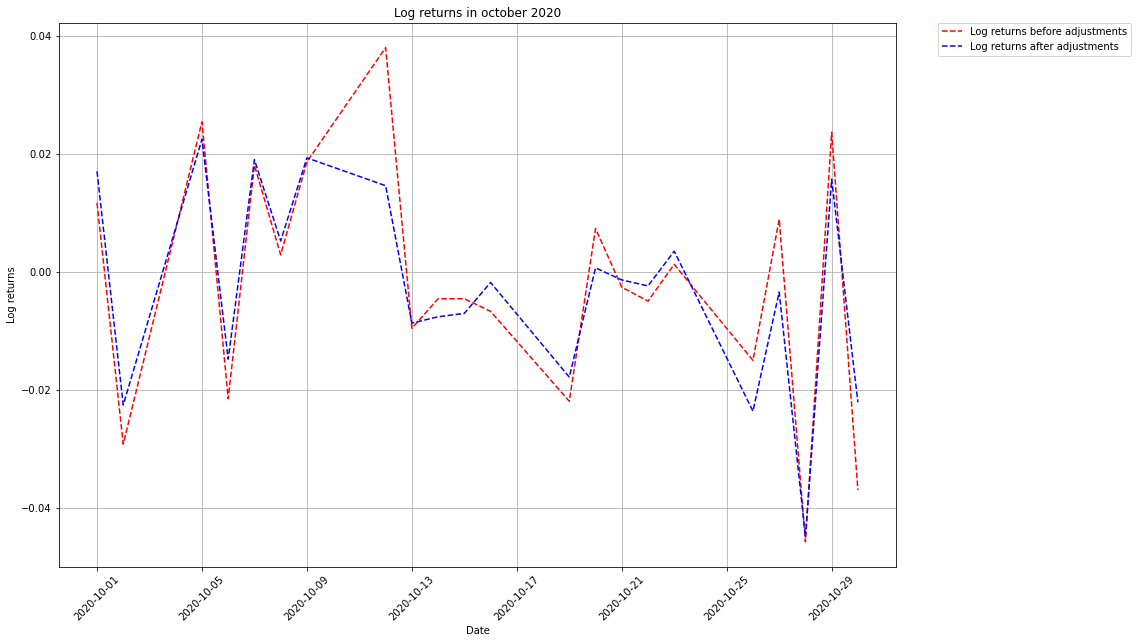

In [183]:
plt.figure(figsize=(15,10))

plt.plot(portfolio_oct_adj['Date'], portfolio_oct_adj['log_return'], 'r--', label='Log returns before adjustments')
plt.plot(portfolio_oct_adj['Date'], portfolio_oct_adj['New Portfolio Log Return'], 'b--', label='Log returns after adjustments')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Log returns')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Log returns in october 2020')
plt.show()